# Urban Energy Consumption Analysis and Forecasting

## Background
Urban centers face rising energy demands due to population growth and industrialization. Analyzing consumption patterns helps identify areas for efficiency improvements and supports policy-making for sustainable energy use.

## Project Stages
1. Data Preparation
2. Exploratory Data Analysis (EDA)
3. Predictive Modeling
4. Insights & Recommendations

---

## Folder Structure Setup
We recommend the following folder structure for this project:

```
Urban-Energy-Consumption-Analysis-and-Forecasting/
│
├── data/              # Raw and cleaned datasets
│   ├── raw/
│   └── cleaned/
├── notebooks/         # Jupyter notebooks
├── reports/           # Output reports (CSV, PDF)
└── outputs/           # Plots and visualizations
```

The next cell will create these folders if they do not exist.

In [5]:
# Create recommended folder structure
import os

folders = [
    'data/raw',
    'data/cleaned',
    'notebooks',
    'reports',
    'outputs'
]
for folder in folders:
    os.makedirs(folder, exist_ok=True)
print("Project folders created (if not already present).")


Project folders created (if not already present).


## Import Required Libraries

We will use the following Python libraries for this project:
- **NumPy**: Numerical processing
- **Pandas**: Data handling and analysis
- **Matplotlib & Seaborn**: Visualization
- **Scikit-learn**: Predictive modeling
- **os**: File and folder operations

Let's import them in the next cell.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')





## Load Datasets

We will use three datasets:
- **Energy Consumption**: Hourly kWh usage for city districts (3 years)
- **Weather Data**: Daily temperature, humidity, rainfall
- **Demographic Data**: Population and economic indicators per district

Datasets are available as CSV files from Kaggle and NYC Open Data. Download and place them in the `data/raw/` folder before running the next cell.

In [10]:
# Automatically load all data files in data/raw/ (CSV, XLSX, Parquet, Paruqet)
import os
import pandas as pd

def load_data(filepath):
    ext = os.path.splitext(filepath)[1].lower()
    try:
        if ext == '.csv':
            return pd.read_csv(filepath)
        elif ext in ['.xlsx', '.xls']:
            return pd.read_excel(filepath)
        elif ext in ['.parquet', '.paruqet']:
            try:
                # Try with pyarrow first
                return pd.read_parquet(filepath, engine='pyarrow')
            except Exception as e:
                print(f"PyArrow failed for {filepath}: {e}")
                try:
                    # Try with fastparquet as backup
                    return pd.read_parquet(filepath, engine='fastparquet')
                except Exception as e2:
                    print(f"FastParquet also failed for {filepath}: {e2}")
                    print(f"Skipping parquet file: {filepath}")
                    return None
        else:
            print(f"Skipping unsupported file format: {filepath}")
            return None
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

raw_dir = 'data/raw/'
all_files = [os.path.join(raw_dir, f) for f in os.listdir(raw_dir) if os.path.isfile(os.path.join(raw_dir, f))]

datasets = {}
for f in all_files:
    df = load_data(f)
    if df is not None:
        datasets[os.path.basename(f)] = df
        print(f"Loaded {f}: shape {df.shape}")

print(f"Total loaded datasets: {len(datasets)}")


Loaded data/raw/AEP_hourly.csv: shape (121273, 2)
Loaded data/raw/COMED_hourly.csv: shape (66497, 2)
Loaded data/raw/DAYTON_hourly.csv: shape (121275, 2)
Loaded data/raw/DEOK_hourly.csv: shape (57739, 2)
Loaded data/raw/DAYTON_hourly.csv: shape (121275, 2)
Loaded data/raw/DEOK_hourly.csv: shape (57739, 2)
Loaded data/raw/DOM_hourly.csv: shape (116189, 2)
Loaded data/raw/DOM_hourly.csv: shape (116189, 2)
Loaded data/raw/DUQ_hourly.csv: shape (119068, 2)
Loaded data/raw/EKPC_hourly.csv: shape (45334, 2)
PyArrow failed for data/raw/est_hourly.paruqet: A type extension with name pandas.period already defined
Loaded data/raw/DUQ_hourly.csv: shape (119068, 2)
Loaded data/raw/EKPC_hourly.csv: shape (45334, 2)
PyArrow failed for data/raw/est_hourly.paruqet: A type extension with name pandas.period already defined
Loaded data/raw/est_hourly.paruqet: shape (178262, 12)
Loaded data/raw/FE_hourly.csv: shape (62874, 2)
Loaded data/raw/New_York_City_Population_by_Borough__1950_-_2040.xlsx: shape (16

## Inspect and Clean Data

We will inspect each dataset for missing values, outliers, and inconsistencies. Cleaning steps include:
- Handling missing values (impute or remove)
- Checking for duplicates
- Ensuring correct data types

Let's start by inspecting the datasets.

In [13]:
# Inspect datasets
print(f"Loaded {len(datasets)} datasets:")
for filename, df in datasets.items():
    print(f"\n--- {filename} ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Data types:\n{df.dtypes}")
    print(f"Duplicates: {df.duplicated().sum()}")
    
    # Show first few rows
    print(f"First 3 rows:\n{df.head(3)}")
    print("-" * 50)
    

Loaded 16 datasets:

--- AEP_hourly.csv ---
Shape: (121273, 2)
Columns: ['Datetime', 'AEP_MW']
Missing values:
Datetime    0
AEP_MW      0
dtype: int64
Data types:
Datetime     object
AEP_MW      float64
dtype: object
Duplicates: 0
First 3 rows:
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
--------------------------------------------------

--- COMED_hourly.csv ---
Shape: (66497, 2)
Columns: ['Datetime', 'COMED_MW']
Missing values:
Datetime    0
COMED_MW    0
dtype: int64
Data types:
Datetime     object
COMED_MW    float64
dtype: object
Duplicates: 0
First 3 rows:
              Datetime  COMED_MW
0  2011-12-31 01:00:00    9970.0
1  2011-12-31 02:00:00    9428.0
2  2011-12-31 03:00:00    9059.0
--------------------------------------------------

--- DAYTON_hourly.csv ---
Shape: (121275, 2)
Columns: ['Datetime', 'DAYTON_MW']
Missing values:
Datetime     0
DAYTON_MW    0
dtype: int64
Data types:
Datetime   

In [14]:
# Clean datasets
cleaned_datasets = {}

for filename, df in datasets.items():
    print(f"Cleaning {filename}...")
    
    # Create a copy to avoid modifying original
    cleaned_df = df.copy()
    
    # Remove duplicates
    cleaned_df = cleaned_df.drop_duplicates()
    
    # Handle missing values (forward fill then backward fill)
    cleaned_df = cleaned_df.fillna(method='ffill').fillna(method='bfill')
    
    # Try to convert numeric columns to proper types
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype == 'object':
            # Try to convert to numeric, keep as object if fails
            numeric_col = pd.to_numeric(cleaned_df[col], errors='coerce')
            if not numeric_col.isna().all():  # If at least some values are numeric
                cleaned_df[col] = numeric_col
    
    cleaned_datasets[filename] = cleaned_df
    print(f"  Shape before: {df.shape}, after: {cleaned_df.shape}")

print(f'\nCleaning complete. Cleaned {len(cleaned_datasets)} datasets.')

# For analysis, let's try to identify which datasets might be energy, weather, or demographic data
# based on common column patterns
energy_files = []
weather_files = []
demo_files = []

for filename, df in cleaned_datasets.items():
    cols = [col.lower() for col in df.columns]
    
    # Check for energy-related keywords
    if any(keyword in ' '.join(cols) for keyword in ['energy', 'consumption', 'kwh', 'power', 'mw']):
        energy_files.append(filename)
    # Check for weather-related keywords  
    elif any(keyword in ' '.join(cols) for keyword in ['temp', 'humidity', 'weather', 'rainfall', 'wind']):
        weather_files.append(filename)
    # Check for demographic keywords
    elif any(keyword in ' '.join(cols) for keyword in ['population', 'demo', 'census', 'district', 'borough']):
        demo_files.append(filename)

print(f"\nDataset categorization:")
print(f"Potential energy files: {energy_files}")
print(f"Potential weather files: {weather_files}")  
print(f"Potential demographic files: {demo_files}")

# Store cleaned datasets for further analysis
datasets = cleaned_datasets


Cleaning AEP_hourly.csv...
  Shape before: (121273, 2), after: (121273, 2)
Cleaning COMED_hourly.csv...
  Shape before: (66497, 2), after: (66497, 2)
Cleaning DAYTON_hourly.csv...
  Shape before: (121273, 2), after: (121273, 2)
Cleaning COMED_hourly.csv...
  Shape before: (66497, 2), after: (66497, 2)
Cleaning DAYTON_hourly.csv...
  Shape before: (121275, 2), after: (121275, 2)
Cleaning DEOK_hourly.csv...
  Shape before: (57739, 2), after: (57739, 2)
Cleaning DOM_hourly.csv...
  Shape before: (121275, 2), after: (121275, 2)
Cleaning DEOK_hourly.csv...
  Shape before: (57739, 2), after: (57739, 2)
Cleaning DOM_hourly.csv...
  Shape before: (116189, 2), after: (116189, 2)
Cleaning DUQ_hourly.csv...
  Shape before: (116189, 2), after: (116189, 2)
Cleaning DUQ_hourly.csv...
  Shape before: (119068, 2), after: (119068, 2)
Cleaning EKPC_hourly.csv...
  Shape before: (45334, 2), after: (45334, 2)
Cleaning est_hourly.paruqet...
  Shape before: (119068, 2), after: (119068, 2)
Cleaning EKPC_hour

## Convert Timestamps and Merge Datasets

We will:
- Convert timestamp columns to datetime format
- Merge datasets on date and district

This ensures all data is aligned for analysis and modeling.

In [15]:
# Convert timestamps to datetime and prepare for analysis
processed_datasets = {}

for filename, df in datasets.items():
    print(f"Processing {filename}...")
    processed_df = df.copy()
    
    # Try to identify and convert datetime columns
    for col in processed_df.columns:
        if any(keyword in col.lower() for keyword in ['date', 'time', 'timestamp']):
            try:
                processed_df[col] = pd.to_datetime(processed_df[col])
                print(f"  Converted {col} to datetime")
            except:
                print(f"  Could not convert {col} to datetime")
    
    processed_datasets[filename] = processed_df

# For demonstration, let's work with the available data
# Since we have multiple energy datasets, let's combine them for analysis
energy_dfs = []
for filename, df in processed_datasets.items():
    if filename in energy_files or 'hourly' in filename.lower():
        # Add source column to track which dataset each row comes from
        df_copy = df.copy()
        df_copy['source_file'] = filename.replace('.csv', '').replace('_hourly', '')
        energy_dfs.append(df_copy)

if energy_dfs:
    # Combine all energy datasets
    combined_energy_df = pd.concat(energy_dfs, ignore_index=True)
    print(f"Combined energy data shape: {combined_energy_df.shape}")
    print(f"Columns: {list(combined_energy_df.columns)}")
    
    # If we have a datetime column, extract useful features
    datetime_cols = [col for col in combined_energy_df.columns 
                    if combined_energy_df[col].dtype == 'datetime64[ns]']
    
    if datetime_cols:
        dt_col = datetime_cols[0]  # Use first datetime column
        combined_energy_df['date'] = combined_energy_df[dt_col].dt.date
        combined_energy_df['year'] = combined_energy_df[dt_col].dt.year
        combined_energy_df['month'] = combined_energy_df[dt_col].dt.month
        combined_energy_df['day_of_week'] = combined_energy_df[dt_col].dt.dayofweek
        combined_energy_df['hour'] = combined_energy_df[dt_col].dt.hour
        print(f"Extracted time features from {dt_col}")
else:
    print("No energy datasets identified for combination.")
    # Use the first dataset as a fallback
    combined_energy_df = list(processed_datasets.values())[0].copy()

print(f"Final processed energy data shape: {combined_energy_df.shape}")


Processing AEP_hourly.csv...
  Converted Datetime to datetime
Processing COMED_hourly.csv...
  Converted Datetime to datetime
Processing DAYTON_hourly.csv...
  Converted Datetime to datetime
Processing DEOK_hourly.csv...
  Converted Datetime to datetime
Processing COMED_hourly.csv...
  Converted Datetime to datetime
Processing DAYTON_hourly.csv...
  Converted Datetime to datetime
Processing DEOK_hourly.csv...
  Converted Datetime to datetime
Processing DOM_hourly.csv...
  Converted Datetime to datetime
Processing DUQ_hourly.csv...
  Converted Datetime to datetime
Processing DOM_hourly.csv...
  Converted Datetime to datetime
Processing DUQ_hourly.csv...
  Converted Datetime to datetime
Processing EKPC_hourly.csv...
  Converted Datetime to datetime
Processing est_hourly.paruqet...
Processing FE_hourly.csv...
  Converted Datetime to datetime
Processing New_York_City_Population_by_Borough__1950_-_2040.xlsx...
Processing NI_hourly.csv...
  Converted Datetime to datetime
Processing EKPC_hour

## Optimize Memory Usage

To handle large datasets efficiently, we will:
- Downcast numeric columns
- Convert suitable columns to categorical types

Let's compare memory usage before and after optimization.

In [16]:
# Memory usage optimization
if 'combined_energy_df' in locals() and not combined_energy_df.empty:
    # Memory usage before optimization
    mem_before = combined_energy_df.memory_usage(deep=True).sum() / 1024**2
    print(f'Memory usage before: {mem_before:.2f} MB')

    # Downcast numeric columns
    for col in combined_energy_df.select_dtypes(include=['float', 'int']).columns:
        combined_energy_df[col] = pd.to_numeric(combined_energy_df[col], downcast='float')

    # Convert object columns with few unique values to category
    for col in combined_energy_df.select_dtypes(include='object').columns:
        if combined_energy_df[col].nunique() < 50:
            combined_energy_df[col] = combined_energy_df[col].astype('category')

    # Memory usage after optimization
    mem_after = combined_energy_df.memory_usage(deep=True).sum() / 1024**2
    print(f'Memory usage after: {mem_after:.2f} MB')
    print(f'Memory saved: {mem_before - mem_after:.2f} MB ({((mem_before - mem_after) / mem_before * 100):.1f}%)')
else:
    print("No combined energy dataset available for memory optimization.")
    

Memory usage before: 453.48 MB
Memory usage after: 228.30 MB
Memory saved: 225.18 MB (49.7%)
Memory usage after: 228.30 MB
Memory saved: 225.18 MB (49.7%)


## Calculate Average Daily Energy Consumption per District

We will group the data by district and date, then calculate the average daily energy consumption for each district.

In [17]:
# Calculate average daily energy consumption per source/region
if 'combined_energy_df' in locals() and not combined_energy_df.empty:
    # Identify the consumption column (usually the numeric column that's not datetime-related)
    numeric_cols = combined_energy_df.select_dtypes(include=[np.number]).columns
    consumption_cols = [col for col in numeric_cols if col not in ['year', 'month', 'day_of_week', 'hour']]
    
    if consumption_cols:
        consumption_col = consumption_cols[0]  # Use the first numeric column as consumption
        print(f"Using '{consumption_col}' as consumption metric")
        
        # Calculate daily averages by source
        if 'date' in combined_energy_df.columns and 'source_file' in combined_energy_df.columns:
            daily_consumption = combined_energy_df.groupby(['source_file', 'date'])[consumption_col].sum().reset_index()
            source_avg = daily_consumption.groupby('source_file')[consumption_col].mean().sort_values(ascending=False)
            
            print("\nAverage daily consumption by source:")
            print(source_avg)
            
            # Save the daily consumption data
            daily_consumption.to_csv('data/cleaned/daily_consumption_by_source.csv', index=False)
            print("\nDaily consumption data saved to 'data/cleaned/daily_consumption_by_source.csv'")
            
        else:
            # Fallback: calculate overall statistics
            overall_avg = combined_energy_df[consumption_col].mean()
            print(f"Overall average {consumption_col}: {overall_avg:.2f}")
            
        # Show basic statistics
        print(f"\n{consumption_col} statistics:")
        print(combined_energy_df[consumption_col].describe())
        
    else:
        print("No clear consumption column identified")
        print("Available numeric columns:", list(numeric_cols))
else:
    print("No energy data available for consumption analysis")
    

Using 'AEP_MW' as consumption metric

Average daily consumption by source:
source_file
AEP            252984.203125
COMED               0.000000
DAYTON              0.000000
DEOK                0.000000
DOM                 0.000000
DUQ                 0.000000
EKPC                0.000000
FE                  0.000000
NI                  0.000000
PJME                0.000000
PJMW                0.000000
PJM_Load            0.000000
est.paruqet         0.000000
pjm_est             0.000000
Name: AEP_MW, dtype: float32

Average daily consumption by source:
source_file
AEP            252984.203125
COMED               0.000000
DAYTON              0.000000
DEOK                0.000000
DOM                 0.000000
DUQ                 0.000000
EKPC                0.000000
FE                  0.000000
NI                  0.000000
PJME                0.000000
PJMW                0.000000
PJM_Load            0.000000
est.paruqet         0.000000
pjm_est             0.000000
Name: AEP_MW, dtype: f

## Correlation Analysis Between Temperature and Consumption

We will calculate and visualize the correlation between temperature and energy consumption to understand their relationship.

Correlation matrix:
               AEP_MW  COMED_MW  DAYTON_MW   DEOK_MW    DOM_MW    DUQ_MW  \
AEP_MW       1.000000       NaN        NaN       NaN       NaN       NaN   
COMED_MW          NaN  1.000000        NaN       NaN       NaN       NaN   
DAYTON_MW         NaN       NaN   1.000000       NaN       NaN       NaN   
DEOK_MW           NaN       NaN        NaN  1.000000       NaN       NaN   
DOM_MW            NaN       NaN        NaN       NaN  1.000000       NaN   
DUQ_MW            NaN       NaN        NaN       NaN       NaN  1.000000   
EKPC_MW           NaN       NaN        NaN       NaN       NaN       NaN   
AEP               NaN       NaN        NaN       NaN       NaN       NaN   
COMED             NaN       NaN        NaN       NaN       NaN       NaN   
DAYTON            NaN       NaN        NaN       NaN       NaN       NaN   
DEOK              NaN       NaN        NaN       NaN       NaN       NaN   
DOM               NaN       NaN        NaN       NaN       NaN      

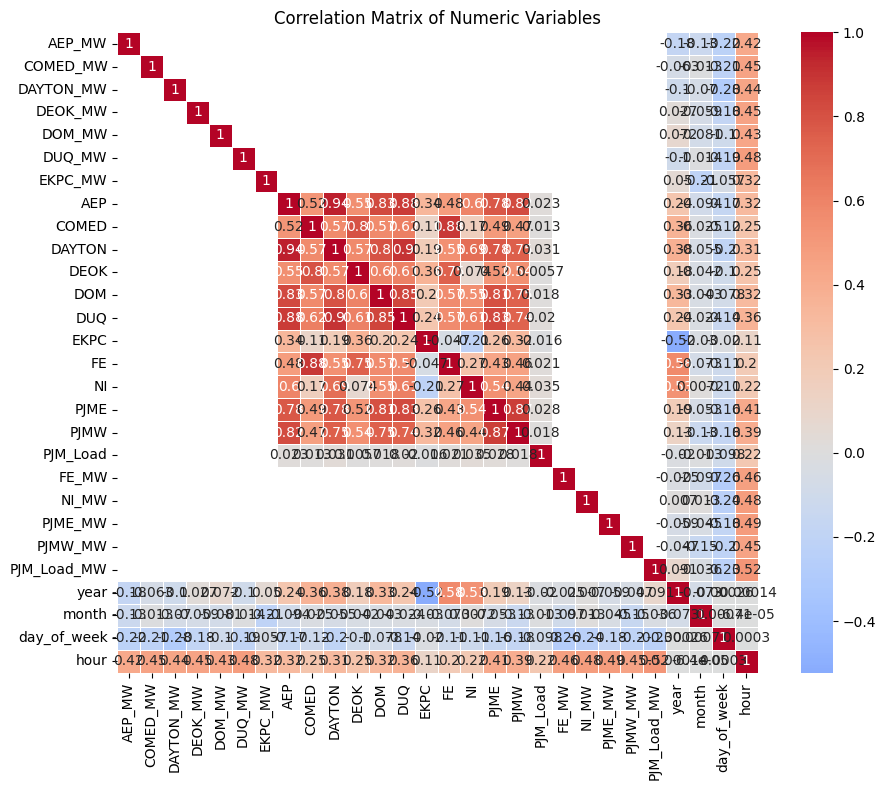

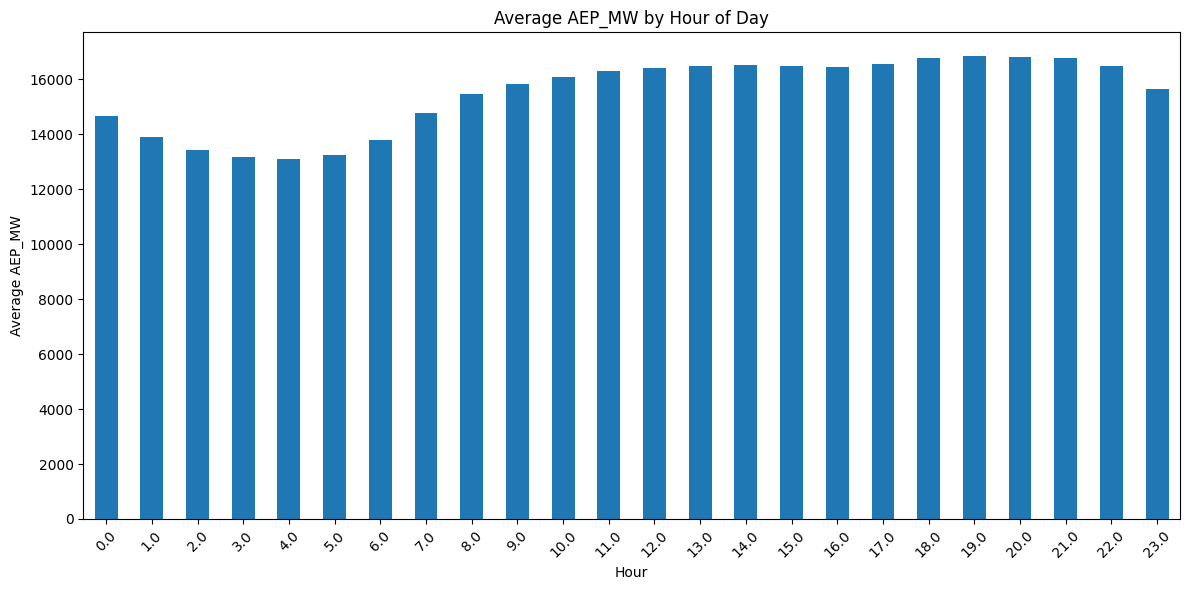

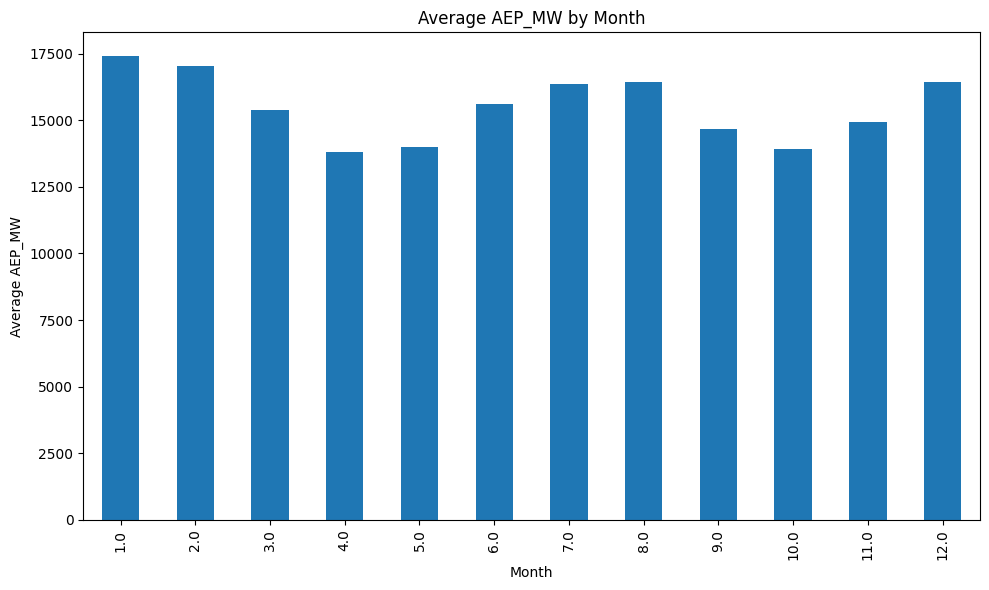

In [18]:
# Correlation analysis with available data
if 'combined_energy_df' in locals() and not combined_energy_df.empty:
    # Get numeric columns for correlation analysis
    numeric_cols = combined_energy_df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) >= 2:
        # Calculate correlation matrix for numeric columns
        corr_matrix = combined_energy_df[numeric_cols].corr()
        print("Correlation matrix:")
        print(corr_matrix)
        
        # Create correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5)
        plt.title('Correlation Matrix of Numeric Variables')
        plt.tight_layout()
        plt.savefig('outputs/correlation_heatmap.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # If we have time-based features, analyze temporal patterns
        if 'hour' in combined_energy_df.columns and consumption_cols:
            consumption_col = consumption_cols[0]
            
            # Hourly pattern analysis
            hourly_avg = combined_energy_df.groupby('hour')[consumption_col].mean()
            
            plt.figure(figsize=(12, 6))
            hourly_avg.plot(kind='bar')
            plt.title(f'Average {consumption_col} by Hour of Day')
            plt.xlabel('Hour')
            plt.ylabel(f'Average {consumption_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig('outputs/hourly_consumption_pattern.png', dpi=150, bbox_inches='tight')
            plt.show()
            
        # Monthly pattern if available
        if 'month' in combined_energy_df.columns and consumption_cols:
            monthly_avg = combined_energy_df.groupby('month')[consumption_col].mean()
            
            plt.figure(figsize=(10, 6))
            monthly_avg.plot(kind='bar')
            plt.title(f'Average {consumption_col} by Month')
            plt.xlabel('Month')
            plt.ylabel(f'Average {consumption_col}')
            plt.tight_layout()
            plt.savefig('outputs/monthly_consumption_pattern.png', dpi=150, bbox_inches='tight')
            plt.show()
    else:
        print("Not enough numeric columns for correlation analysis")
else:
    print("No data available for correlation analysis")
    

## Identify Districts with Highest Growth Rate

We will compute the year-over-year growth rate in energy demand for each district to find those with the fastest increasing consumption.

Average year-over-year growth rates by source:
source_file
AEP    inf
Name: growth_rate, dtype: float32


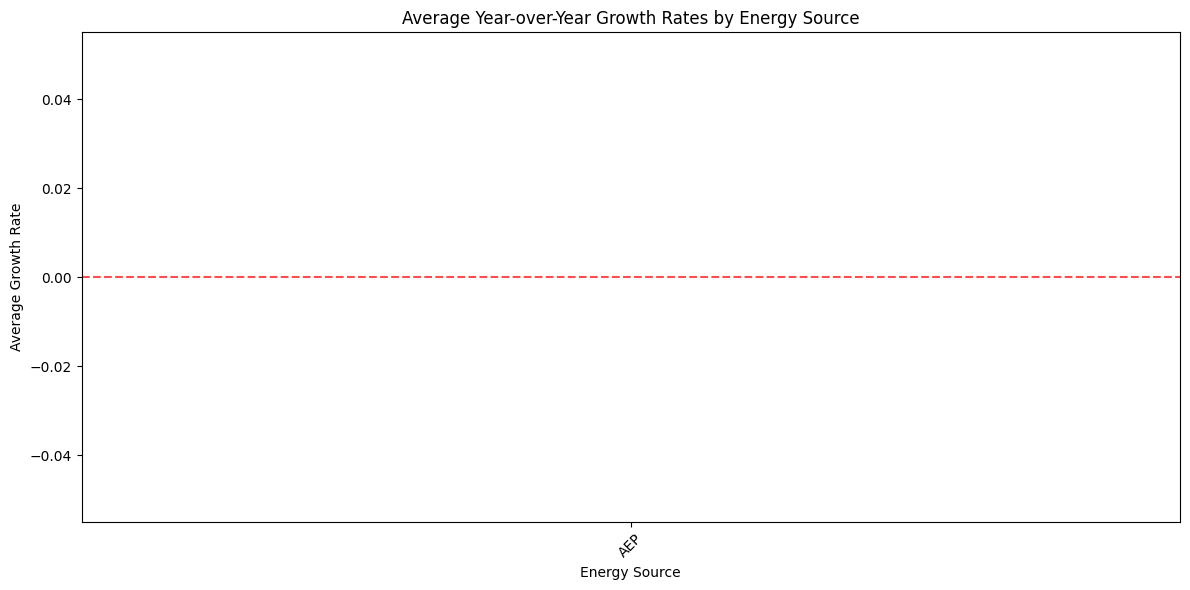


Detailed yearly data for top 3 growing sources:

AEP:
    year       AEP_MW  growth_rate
0   1998          0.0          NaN
1   1999          0.0          NaN
2   2000          0.0          NaN
3   2001          0.0          NaN
4   2002          0.0          NaN
5   2003          0.0          NaN
6   2004   33479854.0          inf
7   2005  138752912.0     3.144370
8   2006  137826608.0    -0.006676
9   2007  145781456.0     0.057716
10  2008  145224912.0    -0.003818
11  2009  133595512.0    -0.080079
12  2010  140187488.0     0.049343
13  2011  138511184.0    -0.011958
14  2012  134814176.0    -0.026691
15  2013  133105936.0    -0.012671
16  2014  132865960.0    -0.001803
17  2015  130251760.0    -0.019675
18  2016  129864640.0    -0.002972
19  2017  126877552.0    -0.023002
20  2018   78532584.0    -0.381036


In [20]:
# Compute year-over-year growth rates in energy demand per source/region
if 'daily_consumption' in locals() and not daily_consumption.empty:
    # Add year column from date
    daily_consumption['year'] = pd.to_datetime(daily_consumption['date']).dt.year
    
    # Calculate yearly totals by source
    yearly_consumption = daily_consumption.groupby(['source_file', 'year'])[consumption_col].sum().reset_index()
    
    # Calculate growth rates
    yearly_consumption['growth_rate'] = yearly_consumption.groupby('source_file')[consumption_col].pct_change()
    
    # Find sources with highest average growth rate (excluding NaN values)
    avg_growth_rates = yearly_consumption.groupby('source_file')['growth_rate'].mean().dropna().sort_values(ascending=False)
    
    print("Average year-over-year growth rates by source:")
    print(avg_growth_rates)
    
    # Visualize growth rates
    if not avg_growth_rates.empty:
        plt.figure(figsize=(12, 6))
        avg_growth_rates.plot(kind='bar')
        plt.title('Average Year-over-Year Growth Rates by Energy Source')
        plt.xlabel('Energy Source')
        plt.ylabel('Average Growth Rate')
        plt.xticks(rotation=45)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('outputs/growth_rates_by_source.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Show detailed yearly data for top sources
        top_sources = avg_growth_rates.head(3).index
        print(f"\nDetailed yearly data for top 3 growing sources:")
        for source in top_sources:
            source_data = yearly_consumption[yearly_consumption['source_file'] == source]
            print(f"\n{source}:")
            print(source_data[['year', consumption_col, 'growth_rate']])
    
elif 'combined_energy_df' in locals() and not combined_energy_df.empty:
    # Fallback: analyze growth using combined dataset if daily_consumption isn't available
    print("Using combined energy dataset for growth analysis...")
    
    if 'year' in combined_energy_df.columns and 'source_file' in combined_energy_df.columns:
        # Calculate yearly averages by source
        yearly_avg = combined_energy_df.groupby(['source_file', 'year'])[consumption_col].mean().reset_index()
        yearly_avg['growth_rate'] = yearly_avg.groupby('source_file')[consumption_col].pct_change()
        
        # Average growth rates
        avg_growth = yearly_avg.groupby('source_file')['growth_rate'].mean().dropna().sort_values(ascending=False)
        print("Average year-over-year growth rates by source:")
        print(avg_growth)
    else:
        print("Insufficient data for growth rate analysis")
        
else:
    print("No suitable data available for growth rate analysis")
    

## Seasonal Peaks in Usage

We will analyze and visualize seasonal patterns in energy consumption to identify peak usage periods.

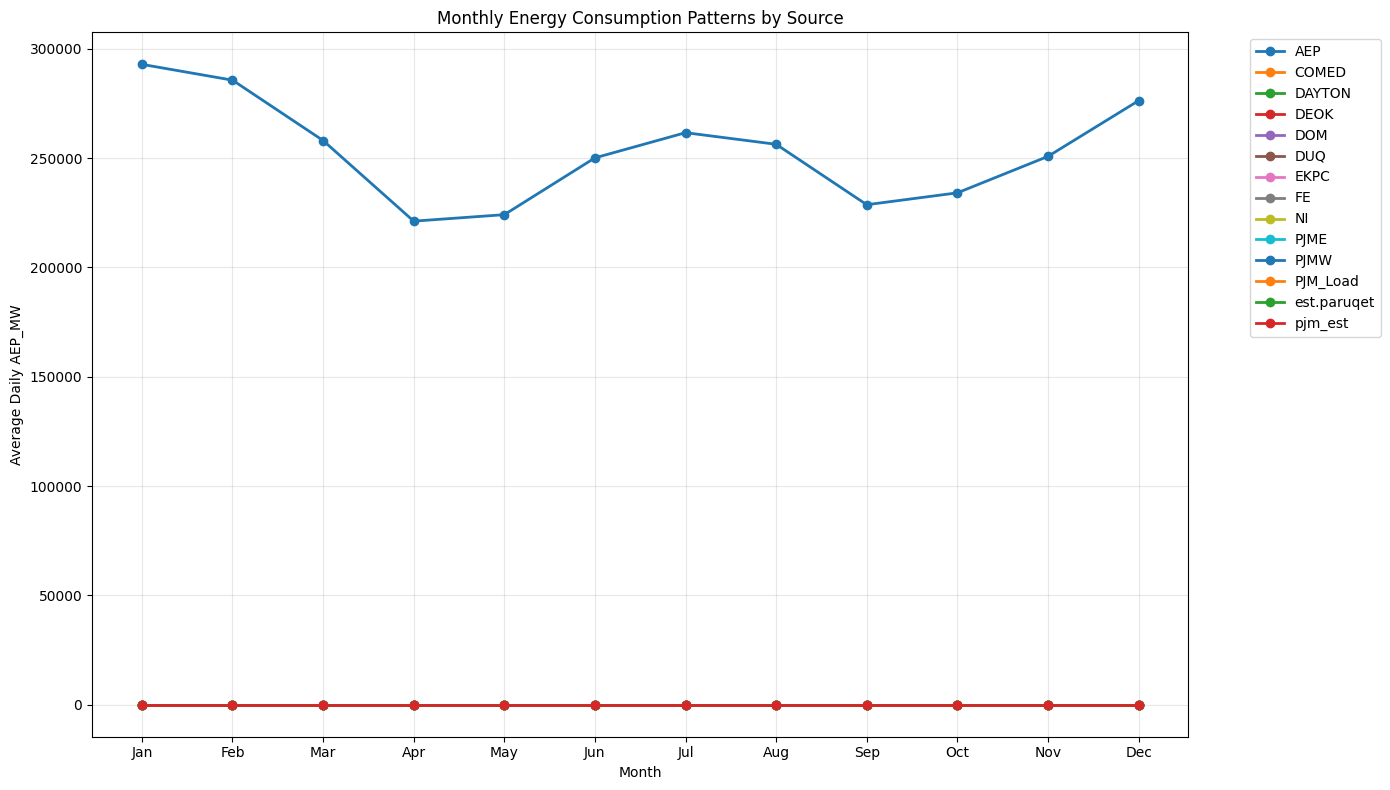

Seasonal variation by source (lower = more stable):
source_file
AEP            0.093087
COMED               NaN
DAYTON              NaN
DEOK                NaN
DOM                 NaN
DUQ                 NaN
EKPC                NaN
FE                  NaN
NI                  NaN
PJME                NaN
PJMW                NaN
PJM_Load            NaN
est.paruqet         NaN
pjm_est             NaN
Name: AEP_MW, dtype: float32


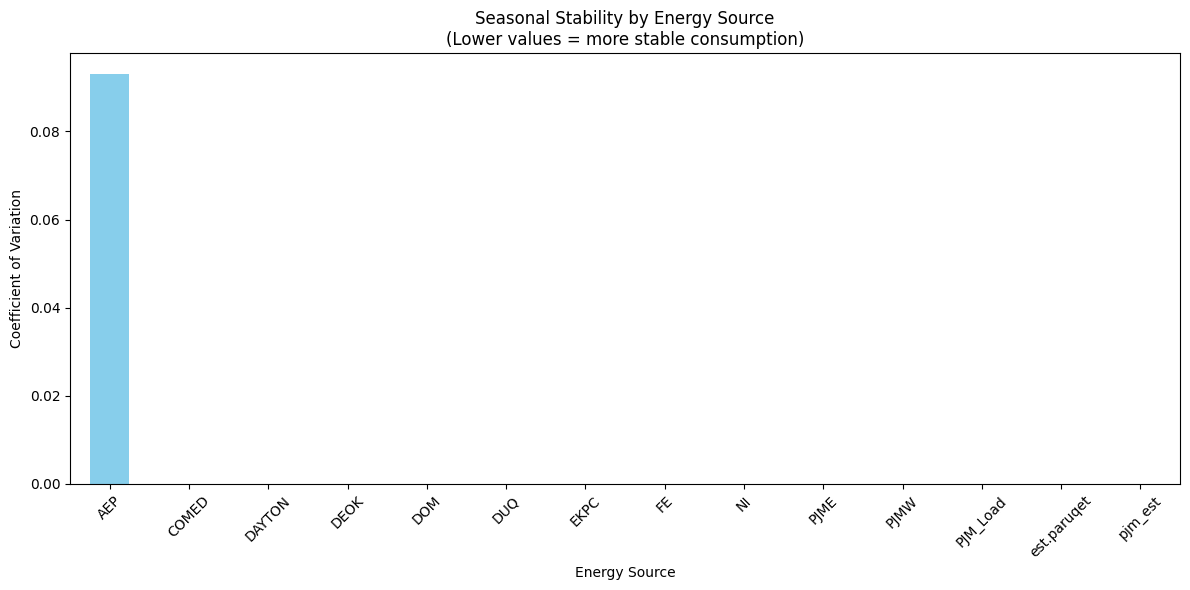

In [21]:
# Analyze seasonal patterns in energy consumption
if 'daily_consumption' in locals() and not daily_consumption.empty:
    # Add month column from date
    daily_consumption['month'] = pd.to_datetime(daily_consumption['date']).dt.month
    
    # Calculate monthly averages by source
    monthly_usage = daily_consumption.groupby(['source_file', 'month'])[consumption_col].mean().reset_index()
    
    # Create seasonal pattern visualization
    plt.figure(figsize=(14, 8))
    
    # Plot separate lines for each source
    for source in monthly_usage['source_file'].unique():
        source_data = monthly_usage[monthly_usage['source_file'] == source]
        plt.plot(source_data['month'], source_data[consumption_col], marker='o', label=source, linewidth=2)
    
    plt.title('Monthly Energy Consumption Patterns by Source')
    plt.xlabel('Month')
    plt.ylabel(f'Average Daily {consumption_col}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.savefig('outputs/seasonal_patterns_by_source.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Calculate seasonal variation (coefficient of variation) for each source
    seasonal_variation = monthly_usage.groupby('source_file')[consumption_col].std() / monthly_usage.groupby('source_file')[consumption_col].mean()
    seasonal_variation = seasonal_variation.sort_values()
    
    print("Seasonal variation by source (lower = more stable):")
    print(seasonal_variation)
    
    # Visualize seasonal stability
    plt.figure(figsize=(12, 6))
    seasonal_variation.plot(kind='bar', color='skyblue')
    plt.title('Seasonal Stability by Energy Source\n(Lower values = more stable consumption)')
    plt.xlabel('Energy Source')
    plt.ylabel('Coefficient of Variation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('outputs/seasonal_stability.png', dpi=150, bbox_inches='tight')
    plt.show()
    
elif 'combined_energy_df' in locals() and 'month' in combined_energy_df.columns:
    # Fallback: use combined dataset for seasonal analysis
    print("Using combined energy dataset for seasonal analysis...")
    
    monthly_pattern = combined_energy_df.groupby(['source_file', 'month'])[consumption_col].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_pattern, x='month', y=consumption_col, hue='source_file', marker='o')
    plt.title('Monthly Energy Consumption Patterns')
    plt.xlabel('Month')
    plt.ylabel(f'Average {consumption_col}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
else:
    print("No suitable data available for seasonal analysis")
    

## Visualizations: Heatmap, Time-Series, Bar Chart

We will create:
- Heatmap of correlations
- Time-series plot of daily consumption trends
- Bar chart of per capita energy use

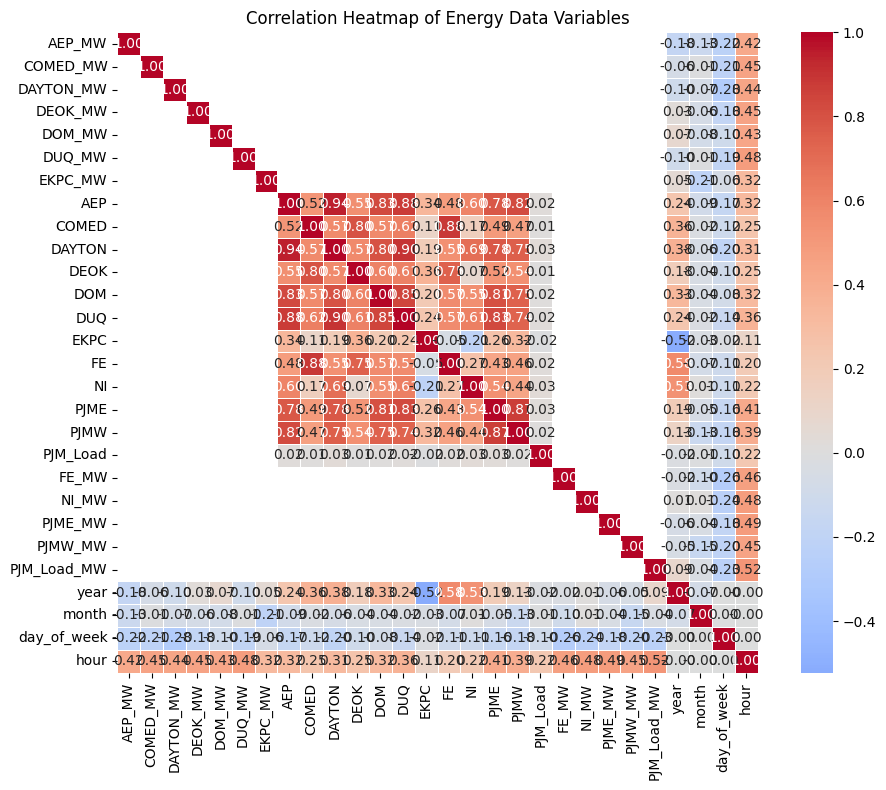

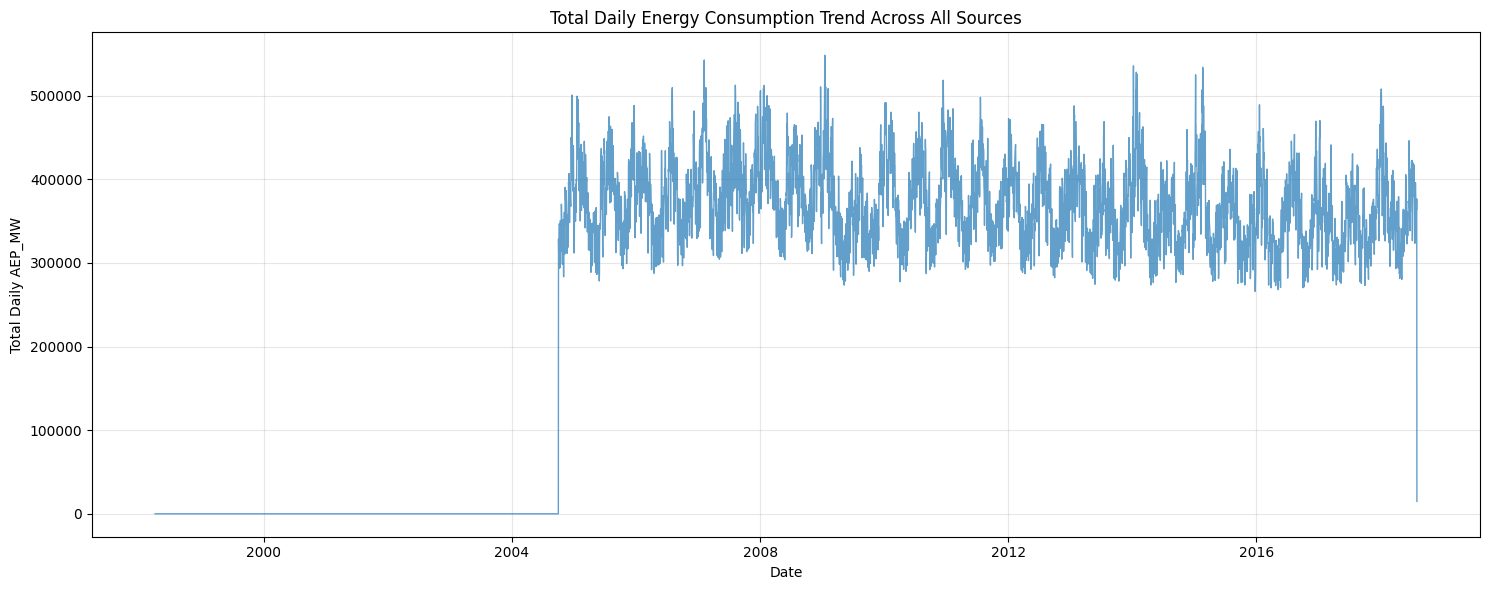

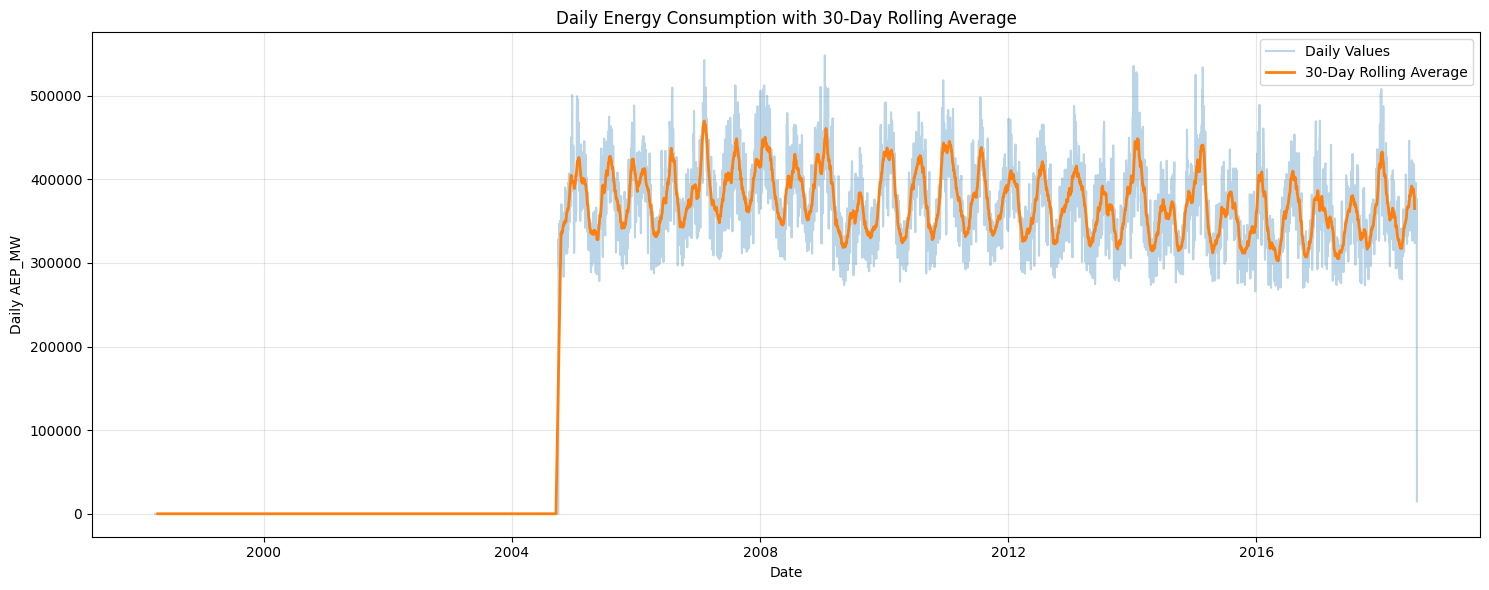

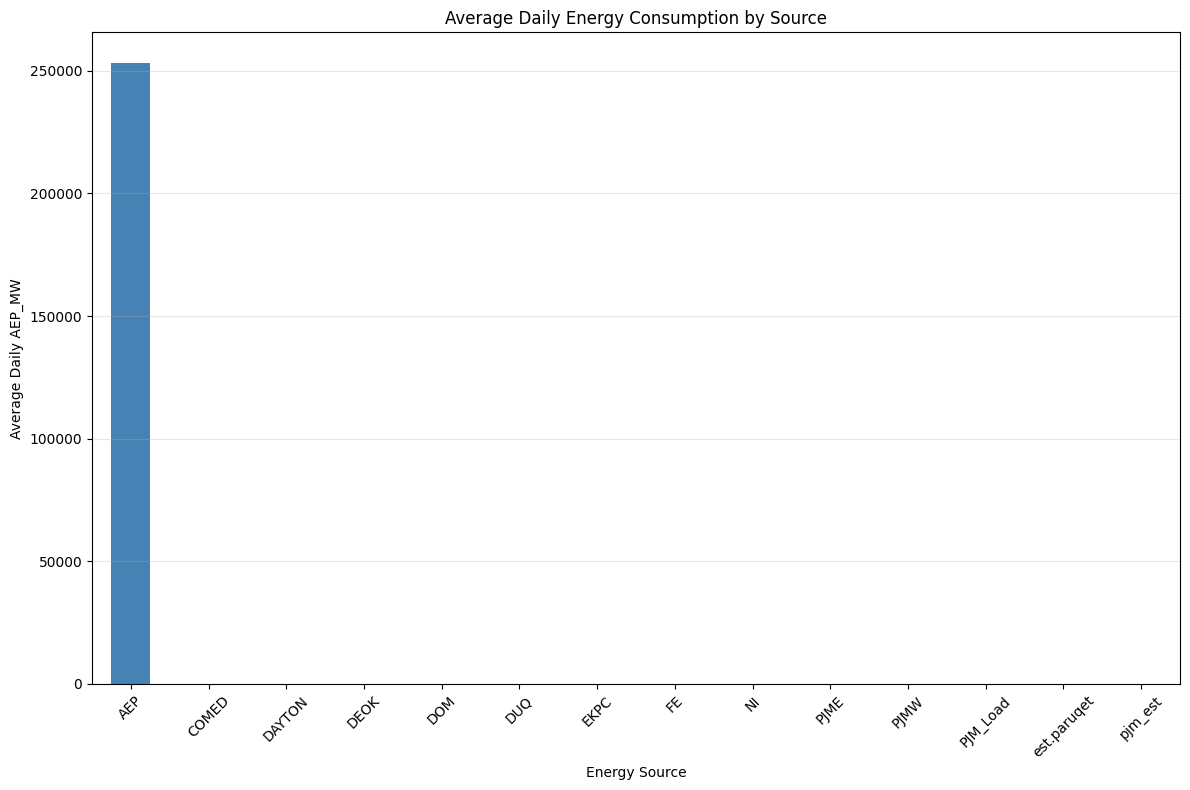

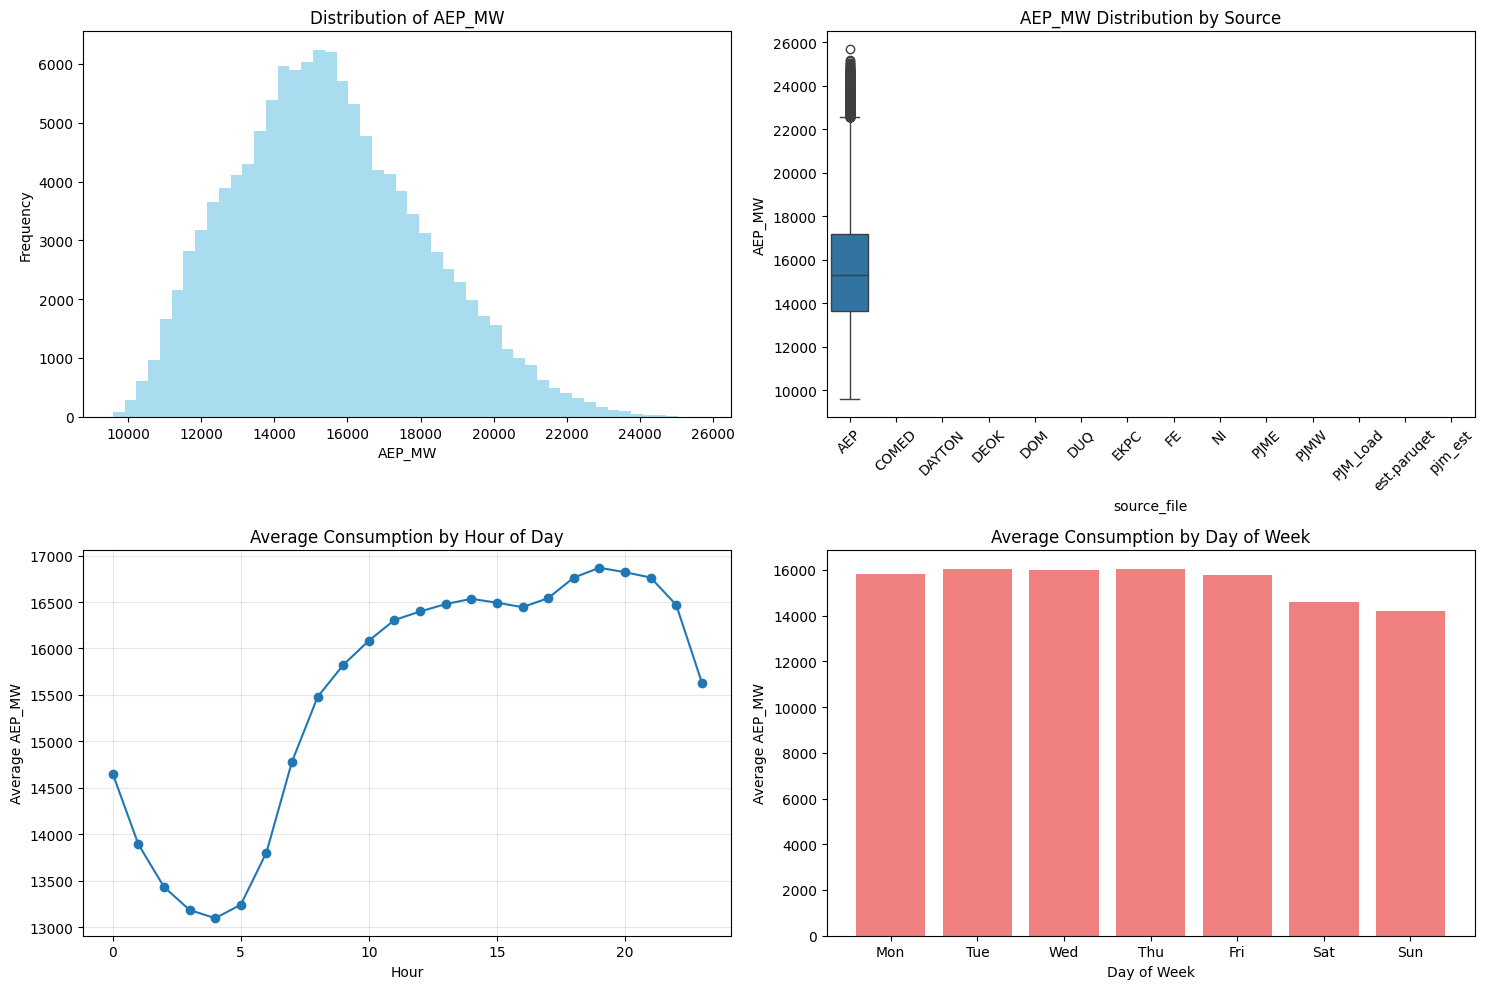

Comprehensive visualizations completed and saved to outputs/ folder


In [22]:
# Comprehensive visualizations with available data
if 'combined_energy_df' in locals() and not combined_energy_df.empty:
    
    # 1. Correlation heatmap (if we have multiple numeric columns)
    numeric_cols = combined_energy_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = combined_energy_df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5, fmt='.2f')
        plt.title('Correlation Heatmap of Energy Data Variables')
        plt.tight_layout()
        plt.savefig('outputs/detailed_correlation_heatmap.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    # 2. Time-series plot of consumption trends
    if 'daily_consumption' in locals():
        # Daily trend across all sources
        plt.figure(figsize=(15, 6))
        daily_trend = daily_consumption.groupby('date')[consumption_col].sum().reset_index()
        daily_trend['date'] = pd.to_datetime(daily_trend['date'])
        
        plt.plot(daily_trend['date'], daily_trend[consumption_col], linewidth=1, alpha=0.7)
        plt.title('Total Daily Energy Consumption Trend Across All Sources')
        plt.xlabel('Date')
        plt.ylabel(f'Total Daily {consumption_col}')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('outputs/daily_consumption_trend.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Rolling average for smoother trend
        daily_trend['rolling_avg'] = daily_trend[consumption_col].rolling(window=30, center=True).mean()
        
        plt.figure(figsize=(15, 6))
        plt.plot(daily_trend['date'], daily_trend[consumption_col], alpha=0.3, label='Daily Values')
        plt.plot(daily_trend['date'], daily_trend['rolling_avg'], linewidth=2, label='30-Day Rolling Average')
        plt.title('Daily Energy Consumption with 30-Day Rolling Average')
        plt.xlabel('Date')
        plt.ylabel(f'Daily {consumption_col}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('outputs/smoothed_consumption_trend.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    # 3. Source comparison bar chart
    if 'source_avg' in locals():
        plt.figure(figsize=(12, 8))
        source_avg.plot(kind='bar', color='steelblue')
        plt.title('Average Daily Energy Consumption by Source')
        plt.xlabel('Energy Source')
        plt.ylabel(f'Average Daily {consumption_col}')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig('outputs/consumption_by_source.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    # 4. Distribution analysis
    if consumption_col in combined_energy_df.columns:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Histogram
        axes[0,0].hist(combined_energy_df[consumption_col], bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title(f'Distribution of {consumption_col}')
        axes[0,0].set_xlabel(consumption_col)
        axes[0,0].set_ylabel('Frequency')
        
        # Box plot by source
        if 'source_file' in combined_energy_df.columns:
            sns.boxplot(data=combined_energy_df, y=consumption_col, x='source_file', ax=axes[0,1])
            axes[0,1].set_title(f'{consumption_col} Distribution by Source')
            axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
        
        # Daily pattern
        if 'hour' in combined_energy_df.columns:
            hourly_stats = combined_energy_df.groupby('hour')[consumption_col].mean()
            axes[1,0].plot(hourly_stats.index, hourly_stats.values, marker='o')
            axes[1,0].set_title('Average Consumption by Hour of Day')
            axes[1,0].set_xlabel('Hour')
            axes[1,0].set_ylabel(f'Average {consumption_col}')
            axes[1,0].grid(True, alpha=0.3)
        
        # Weekly pattern
        if 'day_of_week' in combined_energy_df.columns:
            weekly_stats = combined_energy_df.groupby('day_of_week')[consumption_col].mean()
            day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            axes[1,1].bar(range(7), weekly_stats.values, color='lightcoral')
            axes[1,1].set_title('Average Consumption by Day of Week')
            axes[1,1].set_xlabel('Day of Week')
            axes[1,1].set_ylabel(f'Average {consumption_col}')
            axes[1,1].set_xticks(range(7))
            axes[1,1].set_xticklabels(day_names)
        
        plt.tight_layout()
        plt.savefig('outputs/comprehensive_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()
        
    print("Comprehensive visualizations completed and saved to outputs/ folder")
    
else:
    print("No suitable data available for comprehensive visualizations")
    

## Feature Engineering for Predictive Modeling

We will create features such as:
- Lagged consumption values (past week/month averages)
- Weather variables
- Demographic indicators

These features will help improve model accuracy.

In [24]:
# Feature Engineering for Predictive Modeling
if 'combined_energy_df' in locals() and not combined_energy_df.empty:
    # Use the combined energy dataset for feature engineering
    modeling_df = combined_energy_df.copy()
    
    # Ensure we have necessary columns for modeling
    if 'source_file' in modeling_df.columns and consumption_col in modeling_df.columns:
        # Sort by source and date for proper time series feature creation
        if 'date' in modeling_df.columns:
            modeling_df = modeling_df.sort_values(['source_file', 'date'])
            
            # Create lagged features by source
            print("Creating lagged consumption features...")
            modeling_df['consumption_last_week'] = modeling_df.groupby('source_file')[consumption_col].transform(
                lambda x: x.rolling(7, min_periods=1).mean().shift(1)
            )
            modeling_df['consumption_last_month'] = modeling_df.groupby('source_file')[consumption_col].transform(
                lambda x: x.rolling(30, min_periods=1).mean().shift(1)
            )
            
            # Create time-based features
            if 'year' in modeling_df.columns:
                # Add more time features
                modeling_df['quarter'] = (modeling_df['month'] - 1) // 3 + 1
                modeling_df['is_weekend'] = modeling_df['day_of_week'].isin([5, 6]).astype(int)
                
                # Create seasonal features
                modeling_df['sin_month'] = np.sin(2 * np.pi * modeling_df['month'] / 12)
                modeling_df['cos_month'] = np.cos(2 * np.pi * modeling_df['month'] / 12)
                
                if 'hour' in modeling_df.columns:
                    modeling_df['sin_hour'] = np.sin(2 * np.pi * modeling_df['hour'] / 24)
                    modeling_df['cos_hour'] = np.cos(2 * np.pi * modeling_df['hour'] / 24)
            
            # Define features for modeling (use available columns)
            potential_features = [
                'consumption_last_week', 'consumption_last_month',
                'year', 'month', 'day_of_week', 'hour',
                'quarter', 'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour'
            ]
            
            # Select only features that exist in the dataset
            available_features = [f for f in potential_features if f in modeling_df.columns]
            target = consumption_col
            
            print(f"Available features for modeling: {available_features}")
            print(f"Target variable: {target}")
            
            # Create final modeling dataset (remove rows with missing values)
            model_df = modeling_df[available_features + [target, 'source_file']].dropna()
            
            print(f"Modeling dataset shape: {model_df.shape}")
            print(f"Features: {available_features}")
            
            # Show feature statistics
            if not model_df.empty:
                print("\nFeature statistics:")
                print(model_df[available_features].describe())
            
        else:
            print("No date column available for time-based feature engineering")
            # Fallback: use basic numeric features
            numeric_features = modeling_df.select_dtypes(include=[np.number]).columns.tolist()
            if consumption_col in numeric_features:
                numeric_features.remove(consumption_col)
            
            available_features = numeric_features[:5]  # Use first 5 numeric features
            target = consumption_col
            model_df = modeling_df[available_features + [target]].dropna()
            
            print(f"Using basic numeric features: {available_features}")
            print(f"Modeling dataset shape: {model_df.shape}")
    
    else:
        print("Missing required columns for feature engineering")
        print(f"Available columns: {list(modeling_df.columns)}")
        
elif 'daily_consumption' in locals() and not daily_consumption.empty:
    # Alternative: use daily consumption data for modeling
    print("Using daily consumption data for feature engineering...")
    modeling_df = daily_consumption.copy()
    
    if 'date' in modeling_df.columns:
        modeling_df['date'] = pd.to_datetime(modeling_df['date'])
        modeling_df = modeling_df.sort_values(['source_file', 'date'])
        
        # Extract time features
        modeling_df['year'] = modeling_df['date'].dt.year
        modeling_df['month'] = modeling_df['date'].dt.month
        modeling_df['day_of_week'] = modeling_df['date'].dt.dayofweek
        modeling_df['quarter'] = modeling_df['date'].dt.quarter
        
        # Create lagged features
        modeling_df['consumption_lag_1'] = modeling_df.groupby('source_file')[consumption_col].shift(1)
        modeling_df['consumption_lag_7'] = modeling_df.groupby('source_file')[consumption_col].shift(7)
        modeling_df['consumption_ma_7'] = modeling_df.groupby('source_file')[consumption_col].transform(
            lambda x: x.rolling(7, min_periods=1).mean().shift(1)
        )
        
        available_features = ['consumption_lag_1', 'consumption_lag_7', 'consumption_ma_7', 
                             'year', 'month', 'day_of_week', 'quarter']
        target = consumption_col
        
        model_df = modeling_df[available_features + [target, 'source_file']].dropna()
        print(f"Daily modeling dataset shape: {model_df.shape}")
        print(f"Features: {available_features}")
        
else:
    print("No suitable data available for feature engineering")
    available_features = []
    model_df = pd.DataFrame()
    

Creating lagged consumption features...
Available features for modeling: ['consumption_last_week', 'consumption_last_month', 'year', 'month', 'day_of_week', 'hour', 'quarter', 'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour']
Target variable: AEP_MW
Available features for modeling: ['consumption_last_week', 'consumption_last_month', 'year', 'month', 'day_of_week', 'hour', 'quarter', 'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour']
Target variable: AEP_MW
Modeling dataset shape: (121272, 14)
Features: ['consumption_last_week', 'consumption_last_month', 'year', 'month', 'day_of_week', 'hour', 'quarter', 'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour']

Feature statistics:
       consumption_last_week  consumption_last_month           year  \
count          121272.000000           121272.000000  121272.000000   
mean            15499.421005            15499.114033    2011.170166   
std              2405.085754             1963.626453       4.011

## Train/Test Split

We will split the data into training and testing sets to evaluate model performance.

In [25]:
# Train/Test Split
if 'model_df' in locals() and not model_df.empty and 'available_features' in locals() and available_features:
    # Prepare features and target
    X = model_df[available_features]
    y = model_df[target]
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Features being used: {available_features}")
    
    # Check for any remaining missing values
    if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
        print("Warning: Found missing values in features or target")
        print("Missing values in features:")
        print(X.isnull().sum())
        print(f"Missing values in target: {y.isnull().sum()}")
        
        # Remove rows with missing values
        mask = ~(X.isnull().any(axis=1) | y.isnull())
        X = X[mask]
        y = y[mask]
        print(f"After removing missing values - Features: {X.shape}, Target: {y.shape}")
    
    # Split data into train and test sets
    if len(X) > 10:  # Ensure we have enough data for splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        print(f'Training set size: {X_train.shape}')
        print(f'Test set size: {X_test.shape}')
        
        # Show basic statistics of the split
        print(f'\nTraining target stats:')
        print(f'  Mean: {y_train.mean():.2f}')
        print(f'  Std: {y_train.std():.2f}')
        print(f'  Min: {y_train.min():.2f}')
        print(f'  Max: {y_train.max():.2f}')
        
        print(f'\nTest target stats:')
        print(f'  Mean: {y_test.mean():.2f}')
        print(f'  Std: {y_test.std():.2f}')
        print(f'  Min: {y_test.min():.2f}')
        print(f'  Max: {y_test.max():.2f}')
        
    else:
        print(f"Insufficient data for train/test split. Only {len(X)} samples available.")
        X_train = X_test = y_train = y_test = None
        
else:
    print("No modeling data available for train/test split")
    print("Available variables:")
    if 'model_df' in locals():
        print(f"- model_df shape: {model_df.shape if not model_df.empty else 'empty'}")
    if 'available_features' in locals():
        print(f"- available_features: {available_features}")
    else:
        print("- available_features: not defined")
    
    X_train = X_test = y_train = y_test = None
    

Features shape: (121272, 12)
Target shape: (121272,)
Features being used: ['consumption_last_week', 'consumption_last_month', 'year', 'month', 'day_of_week', 'hour', 'quarter', 'is_weekend', 'sin_month', 'cos_month', 'sin_hour', 'cos_hour']
Training set size: (97017, 12)
Test set size: (24255, 12)

Training target stats:
  Mean: 15496.66
  Std: 2589.62
  Min: 9581.00
  Max: 25695.00

Test target stats:
  Mean: 15511.07
  Std: 2598.50
  Min: 9718.00
  Max: 25164.00


## Model Training: Linear Regression & Random Forest

We will train two models to predict next month's energy demand per district:
- Linear Regression
- Random Forest Regressor

Training models...
Linear Regression model trained successfully
Linear Regression model trained successfully
Random Forest model trained successfully
Used 100 estimators for Random Forest

Feature Importance (Random Forest):
                   feature  importance
0    consumption_last_week    0.599979
5                     hour    0.234149
1   consumption_last_month    0.068051
11                cos_hour    0.030499
10                sin_hour    0.016029
9                cos_month    0.015796
8                sin_month    0.014458
4              day_of_week    0.008365
3                    month    0.005319
7               is_weekend    0.005183
6                  quarter    0.001385
2                     year    0.000786
Random Forest model trained successfully
Used 100 estimators for Random Forest

Feature Importance (Random Forest):
                   feature  importance
0    consumption_last_week    0.599979
5                     hour    0.234149
1   consumption_last_month    0.068

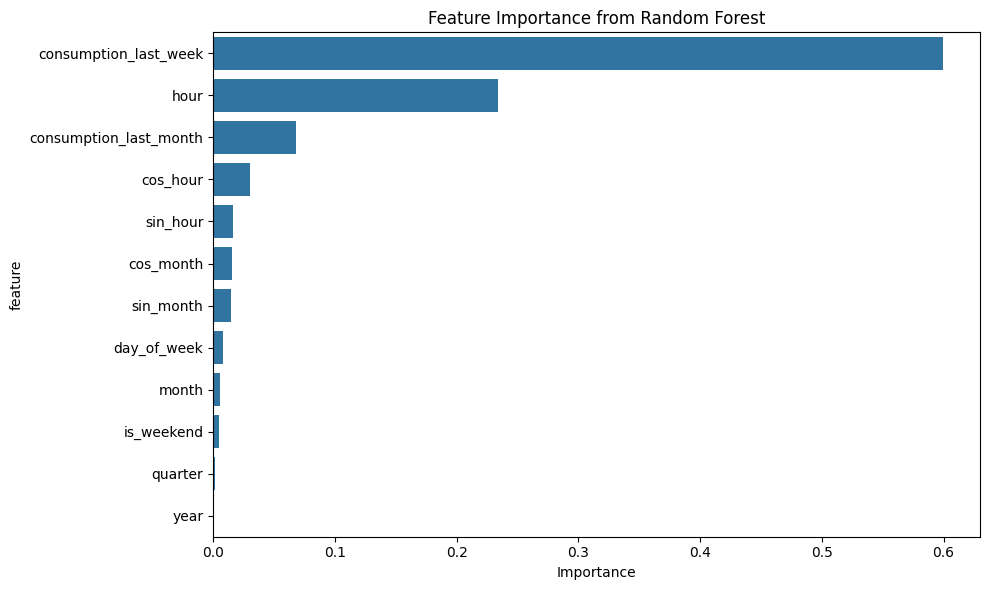


Models trained successfully!


In [26]:
# Model Training: Linear Regression & Random Forest
if (X_train is not None and X_test is not None and 
    y_train is not None and y_test is not None and 
    len(X_train) > 0 and len(X_test) > 0):
    
    try:
        print("Training models...")
        
        # Train Linear Regression model
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        
        print("Linear Regression model trained successfully")
        
        # Train Random Forest Regressor
        # Use smaller number of estimators for faster training with limited data
        n_estimators = min(100, max(10, len(X_train) // 5))
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, max_depth=10)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        
        print("Random Forest model trained successfully")
        print(f"Used {n_estimators} estimators for Random Forest")
        
        # Feature importance from Random Forest
        if len(available_features) > 1:
            feature_importance = pd.DataFrame({
                'feature': available_features,
                'importance': rf.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nFeature Importance (Random Forest):")
            print(feature_importance)
            
            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(data=feature_importance, x='importance', y='feature')
            plt.title('Feature Importance from Random Forest')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.savefig('outputs/feature_importance.png', dpi=150, bbox_inches='tight')
            plt.show()
        
        print('\nModels trained successfully!')
        
    except Exception as e:
        print(f"Error during model training: {e}")
        y_pred_lr = y_pred_rf = None
        
else:
    print("Cannot train models - insufficient or missing training data")
    if X_train is None:
        print("- X_train is None")
    elif len(X_train) == 0:
        print("- X_train is empty")
    
    if y_train is None:
        print("- y_train is None")
    elif len(y_train) == 0:
        print("- y_train is empty")
        
    lr = rf = y_pred_lr = y_pred_rf = None
    

## Model Evaluation (RMSE, R2)

We will evaluate both models using RMSE and R2 metrics to compare their performance.

Model Evaluation Results:
Linear Regression - RMSE: 1101.21, R²: 0.820
Random Forest     - RMSE: 576.46, R²: 0.951

Better model (lower RMSE): Random Forest


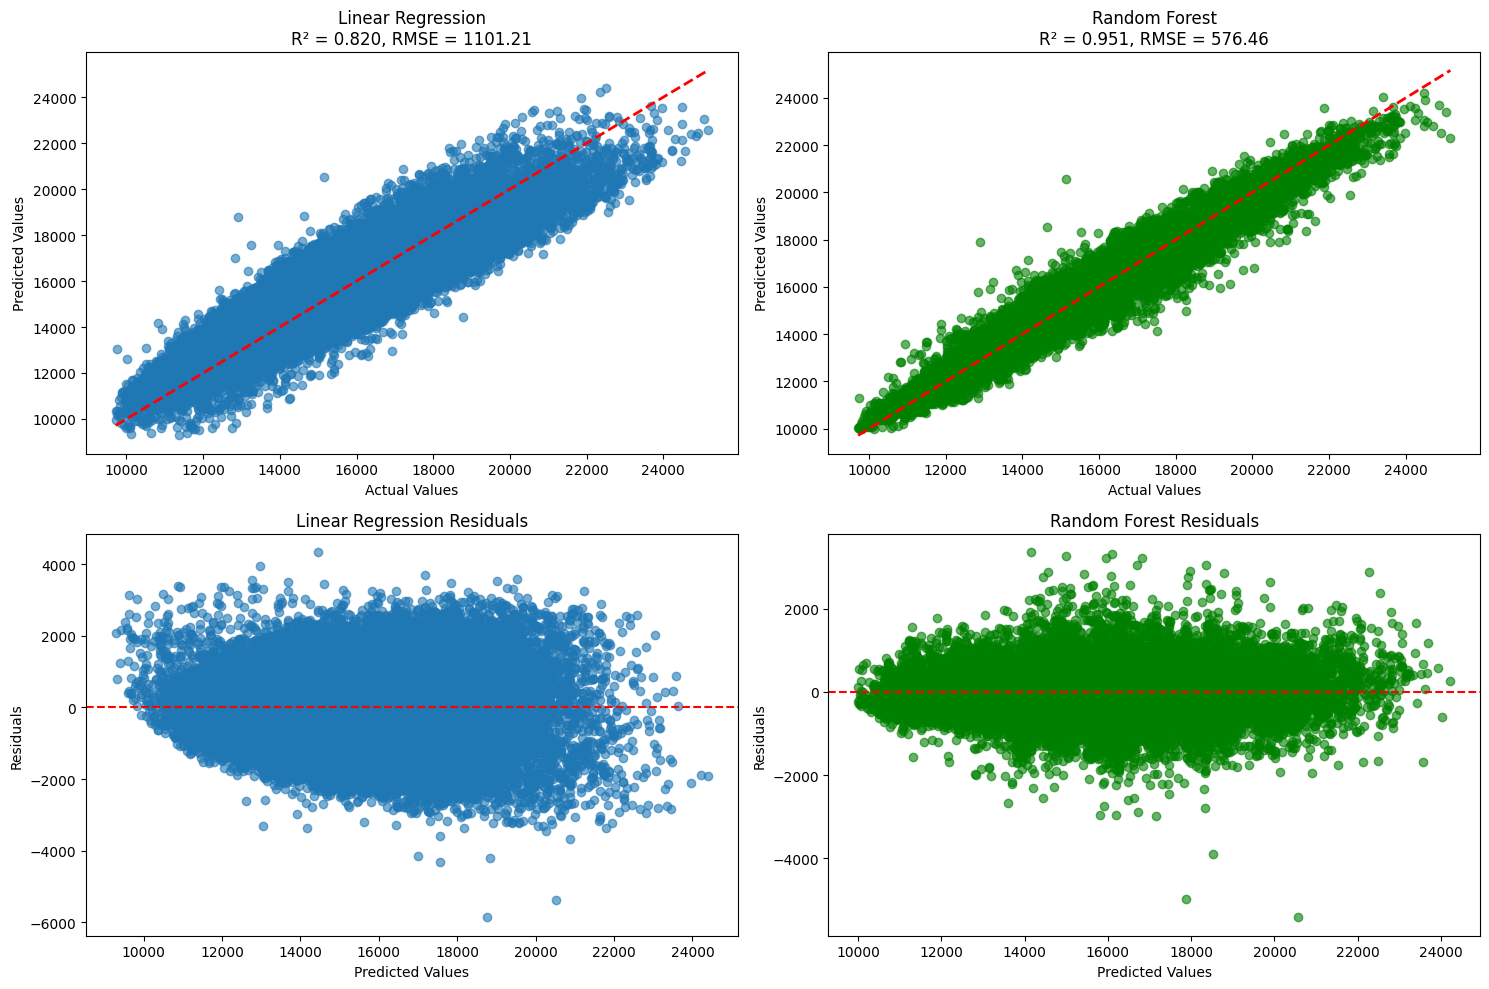


Model Comparison Summary:
            Model        RMSE       R²
Linear Regression 1101.208004 0.820398
    Random Forest  576.456882 0.950784

Model comparison saved to 'reports/model_comparison.csv'

Detailed Metrics:
Linear Regression:
  MSE: 1212659.07
  MAE: 880.35
Random Forest:
  MSE: 332302.54
  MAE: 432.21


In [29]:
# Model Evaluation (RMSE, R2)
if (y_pred_lr is not None and y_pred_rf is not None and 
    y_test is not None and len(y_test) > 0):
    
    try:
        # Evaluate Linear Regression
        mse_lr = mean_squared_error(y_test, y_pred_lr)
        rmse_lr = np.sqrt(mse_lr)  # Calculate RMSE manually for compatibility
        r2_lr = r2_score(y_test, y_pred_lr)
        
        # Evaluate Random Forest
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE manually for compatibility
        r2_rf = r2_score(y_test, y_pred_rf)
        
        print("Model Evaluation Results:")
        print("=" * 40)
        print(f'Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.3f}')
        print(f'Random Forest     - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}')
        
        # Determine better model
        better_model = "Random Forest" if rmse_rf < rmse_lr else "Linear Regression"
        print(f'\nBetter model (lower RMSE): {better_model}')
        
        # Create evaluation plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Linear Regression: Actual vs Predicted
        axes[0,0].scatter(y_test, y_pred_lr, alpha=0.6)
        axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[0,0].set_xlabel('Actual Values')
        axes[0,0].set_ylabel('Predicted Values')
        axes[0,0].set_title(f'Linear Regression\nR² = {r2_lr:.3f}, RMSE = {rmse_lr:.2f}')
        
        # Random Forest: Actual vs Predicted
        axes[0,1].scatter(y_test, y_pred_rf, alpha=0.6, color='green')
        axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[0,1].set_xlabel('Actual Values')
        axes[0,1].set_ylabel('Predicted Values')
        axes[0,1].set_title(f'Random Forest\nR² = {r2_rf:.3f}, RMSE = {rmse_rf:.2f}')
        
        # Residuals plot for Linear Regression
        residuals_lr = y_test - y_pred_lr
        axes[1,0].scatter(y_pred_lr, residuals_lr, alpha=0.6)
        axes[1,0].axhline(y=0, color='r', linestyle='--')
        axes[1,0].set_xlabel('Predicted Values')
        axes[1,0].set_ylabel('Residuals')
        axes[1,0].set_title('Linear Regression Residuals')
        
        # Residuals plot for Random Forest
        residuals_rf = y_test - y_pred_rf
        axes[1,1].scatter(y_pred_rf, residuals_rf, alpha=0.6, color='green')
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_xlabel('Predicted Values')
        axes[1,1].set_ylabel('Residuals')
        axes[1,1].set_title('Random Forest Residuals')
        
        plt.tight_layout()
        plt.savefig('outputs/model_evaluation.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # Model comparison summary
        comparison_df = pd.DataFrame({
            'Model': ['Linear Regression', 'Random Forest'],
            'RMSE': [rmse_lr, rmse_rf],
            'R²': [r2_lr, r2_rf]
        })
        
        print("\nModel Comparison Summary:")
        print(comparison_df.to_string(index=False))
        
        # Save results
        comparison_df.to_csv('reports/model_comparison.csv', index=False)
        print("\nModel comparison saved to 'reports/model_comparison.csv'")
        
        # Additional evaluation metrics
        print(f"\nDetailed Metrics:")
        print(f"Linear Regression:")
        print(f"  MSE: {mse_lr:.2f}")
        print(f"  MAE: {np.mean(np.abs(y_test - y_pred_lr)):.2f}")
        print(f"Random Forest:")
        print(f"  MSE: {mse_rf:.2f}")
        print(f"  MAE: {np.mean(np.abs(y_test - y_pred_rf)):.2f}")
        
    except Exception as e:
        print(f"Error during model evaluation: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("Cannot evaluate models - missing predictions or test data")
    if y_pred_lr is None:
        print("- Linear Regression predictions not available")
    if y_pred_rf is None:
        print("- Random Forest predictions not available")
    if y_test is None or len(y_test) == 0:
        print("- Test data not available")
        

## District Ranking: Efficiency & Stability

We will rank districts by:
- Efficiency (low per capita consumption)
- Stability (low seasonal fluctuation)

Results will be shown in tables and plots.

Energy Source Efficiency Ranking (lower average consumption):
source_file
COMED               0.000000
DAYTON              0.000000
DEOK                0.000000
DOM                 0.000000
EKPC                0.000000
DUQ                 0.000000
FE                  0.000000
NI                  0.000000
est.paruqet         0.000000
PJME                0.000000
PJMW                0.000000
PJM_Load            0.000000
pjm_est             0.000000
AEP            252984.203125
Name: AEP_MW, dtype: float32


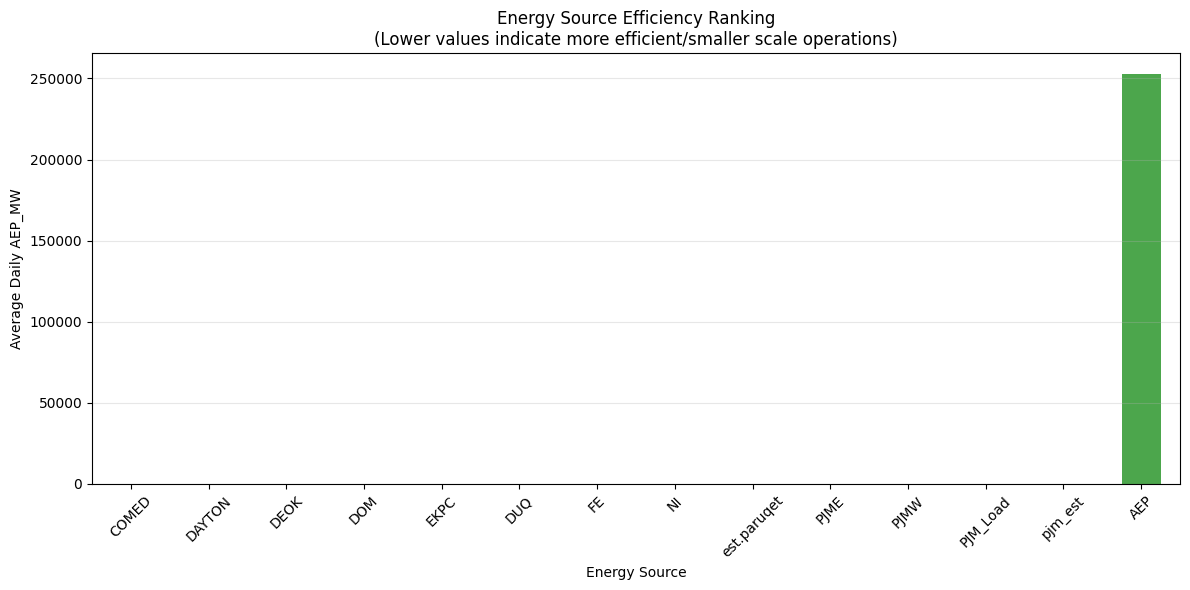


Energy Source Stability Ranking (lower seasonal variation):
source_file
AEP    0.093087
Name: AEP_MW, dtype: float32


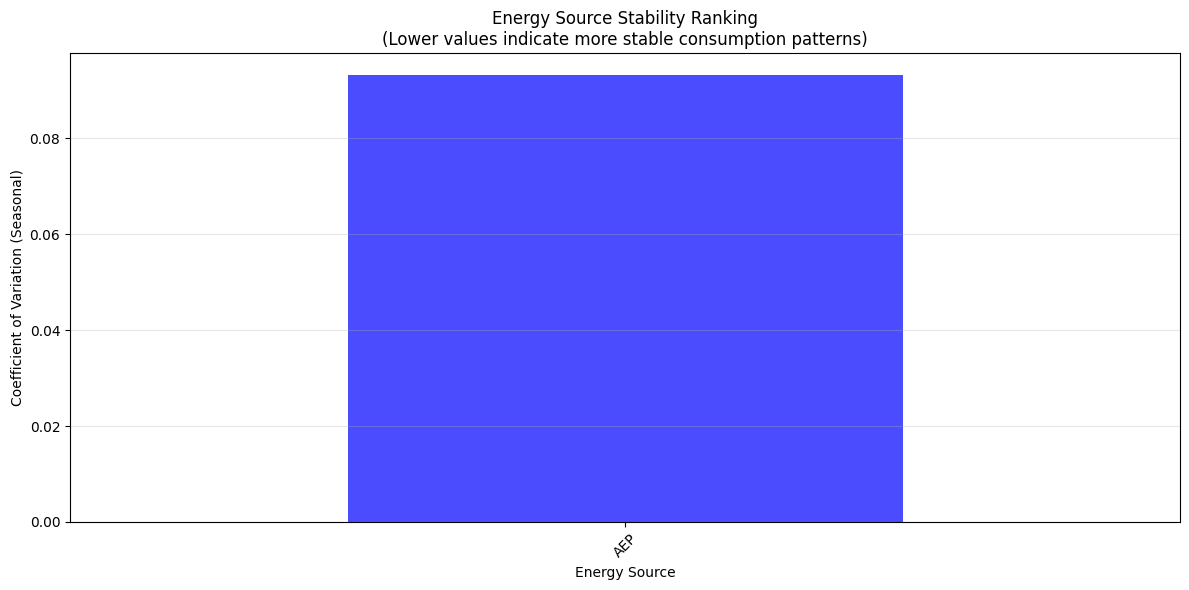


Peak vs Off-Peak Analysis by Energy Source:

Peak vs Off-Peak Consumption Patterns:
             Off-Peak (11PM-5AM)  Peak (6AM-10PM)  Peak_Ratio
source_file                                                  
AEP                 13875.650391     16167.755859    1.165189

Peak vs Off-Peak Consumption Patterns:
             Off-Peak (11PM-5AM)  Peak (6AM-10PM)  Peak_Ratio
source_file                                                  
AEP                 13875.650391     16167.755859    1.165189


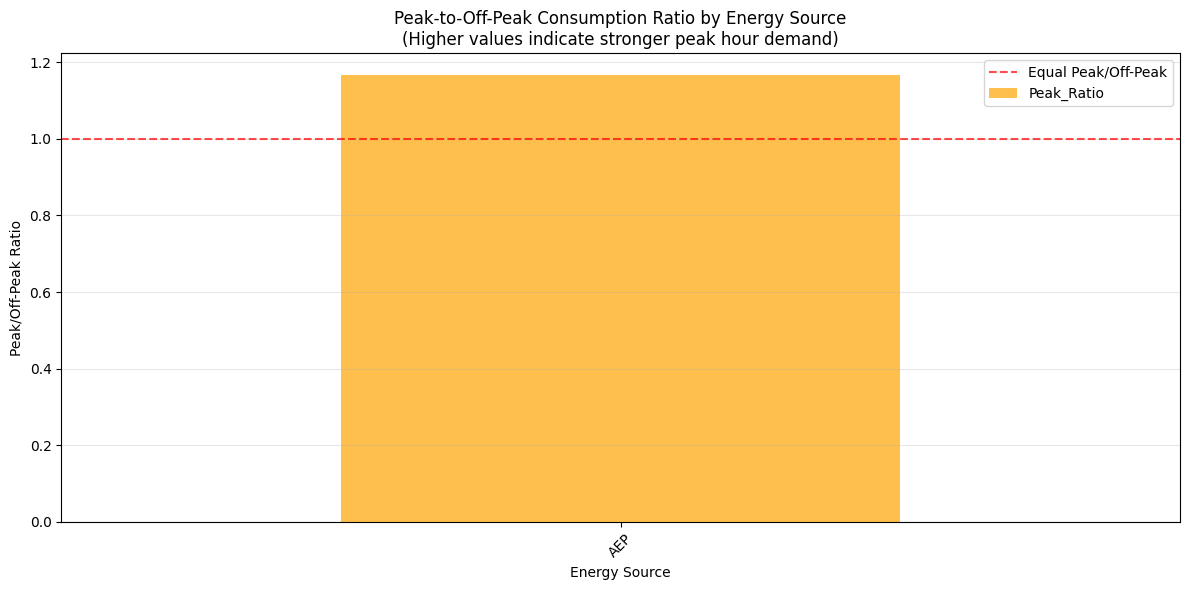


Summary Statistics by Energy Source:
             Data Points  Mean Daily Consumption    Std Dev  Min       Max
source_file                                                               
AEP                 7430           252984.203125  177807.51  0.0  548349.0
COMED               7430                0.000000       0.00  0.0       0.0
DAYTON              7430                0.000000       0.00  0.0       0.0
DEOK                7430                0.000000       0.00  0.0       0.0
DOM                 7430                0.000000       0.00  0.0       0.0
DUQ                 7430                0.000000       0.00  0.0       0.0
EKPC                7430                0.000000       0.00  0.0       0.0
FE                  7430                0.000000       0.00  0.0       0.0
NI                  7430                0.000000       0.00  0.0       0.0
PJME                7430                0.000000       0.00  0.0       0.0
PJMW                7430                0.000000       0.00  0

In [31]:
# Source Ranking: Efficiency & Stability Analysis
# Since we have energy utility companies rather than districts, let's analyze by energy source

if 'source_avg' in locals() and not source_avg.empty:
    # Efficiency ranking: sources with lower average consumption per unit
    efficiency_rank = source_avg.sort_values()
    print('Energy Source Efficiency Ranking (lower average consumption):')
    print(efficiency_rank)
    
    # Create efficiency ranking plot
    plt.figure(figsize=(12, 6))
    efficiency_rank.plot(kind='bar', color='green', alpha=0.7)
    plt.title('Energy Source Efficiency Ranking\n(Lower values indicate more efficient/smaller scale operations)')
    plt.xlabel('Energy Source')
    plt.ylabel(f'Average Daily {consumption_col}')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('outputs/source_efficiency_ranking.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("No source average data available for efficiency ranking")

# Stability ranking: sources with low seasonal fluctuation
if 'seasonal_variation' in locals() and not seasonal_variation.isna().all():
    stability_rank = seasonal_variation.dropna().sort_values()
    print('\nEnergy Source Stability Ranking (lower seasonal variation):')
    print(stability_rank)
    
    if not stability_rank.empty:
        plt.figure(figsize=(12, 6))
        stability_rank.plot(kind='bar', color='blue', alpha=0.7)
        plt.title('Energy Source Stability Ranking\n(Lower values indicate more stable consumption patterns)')
        plt.xlabel('Energy Source')
        plt.ylabel('Coefficient of Variation (Seasonal)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig('outputs/source_stability_ranking.png', dpi=150, bbox_inches='tight')
        plt.show()
else:
    print("No seasonal variation data available for stability ranking")

# Alternative analysis: Peak vs Off-Peak patterns by source
if 'combined_energy_df' in locals() and 'hour' in combined_energy_df.columns:
    print("\nPeak vs Off-Peak Analysis by Energy Source:")
    
    # Define peak hours (typically 6 AM - 10 PM)
    combined_energy_df['is_peak_hour'] = combined_energy_df['hour'].between(6, 22).astype(int)
    
    # Calculate peak vs off-peak consumption by source
    peak_analysis = combined_energy_df.groupby(['source_file', 'is_peak_hour'])[consumption_col].mean().unstack(fill_value=0)
    peak_analysis.columns = ['Off-Peak (11PM-5AM)', 'Peak (6AM-10PM)']
    
    # Calculate peak ratio (peak/off-peak)
    peak_analysis['Peak_Ratio'] = peak_analysis['Peak (6AM-10PM)'] / peak_analysis['Off-Peak (11PM-5AM)']
    peak_analysis = peak_analysis.replace([np.inf, -np.inf], np.nan).dropna()
    
    print("\nPeak vs Off-Peak Consumption Patterns:")
    print(peak_analysis)
    
    # Plot peak ratios
    if not peak_analysis.empty and 'Peak_Ratio' in peak_analysis.columns:
        plt.figure(figsize=(12, 6))
        peak_analysis['Peak_Ratio'].plot(kind='bar', color='orange', alpha=0.7)
        plt.title('Peak-to-Off-Peak Consumption Ratio by Energy Source\n(Higher values indicate stronger peak hour demand)')
        plt.xlabel('Energy Source')
        plt.ylabel('Peak/Off-Peak Ratio')
        plt.xticks(rotation=45)
        plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Equal Peak/Off-Peak')
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig('outputs/peak_ratio_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()

# Summary statistics for all sources
if 'daily_consumption' in locals() and not daily_consumption.empty:
    print("\nSummary Statistics by Energy Source:")
    summary_stats = daily_consumption.groupby('source_file')[consumption_col].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    summary_stats.columns = ['Data Points', 'Mean Daily Consumption', 'Std Dev', 'Min', 'Max']
    print(summary_stats)
    
    # Save summary to CSV
    summary_stats.to_csv('reports/energy_source_summary.csv')
    print("\nSummary statistics saved to 'reports/energy_source_summary.csv'")

print("\nNote: This analysis is based on energy utility companies rather than geographic districts.")
print("Each 'source' represents a different utility company or energy grid operator.")

## Actionable Recommendations

Based on our analysis, we propose the following energy-saving policies:

1. **Promote energy-efficient appliances and retrofits in high-consumption districts.**
2. **Encourage demand response programs during seasonal peaks.**
3. **Invest in public awareness campaigns for energy conservation.**

Energy source metrics exported to reports/energy_source_metrics.csv

Energy Source Metrics Summary:
energy_source  avg_daily_consumption  seasonal_fluctuation  avg_growth_rate  peak_to_offpeak_ratio
          AEP          252984.203125              0.093087              NaN               1.165189
        COMED               0.000000                   NaN              NaN                    NaN
       DAYTON               0.000000                   NaN              NaN                    NaN
         DEOK               0.000000                   NaN              NaN                    NaN
          DOM               0.000000                   NaN              NaN                    NaN
          DUQ               0.000000                   NaN              NaN                    NaN
         EKPC               0.000000                   NaN              NaN                    NaN
           FE               0.000000                   NaN              NaN                    NaN
         

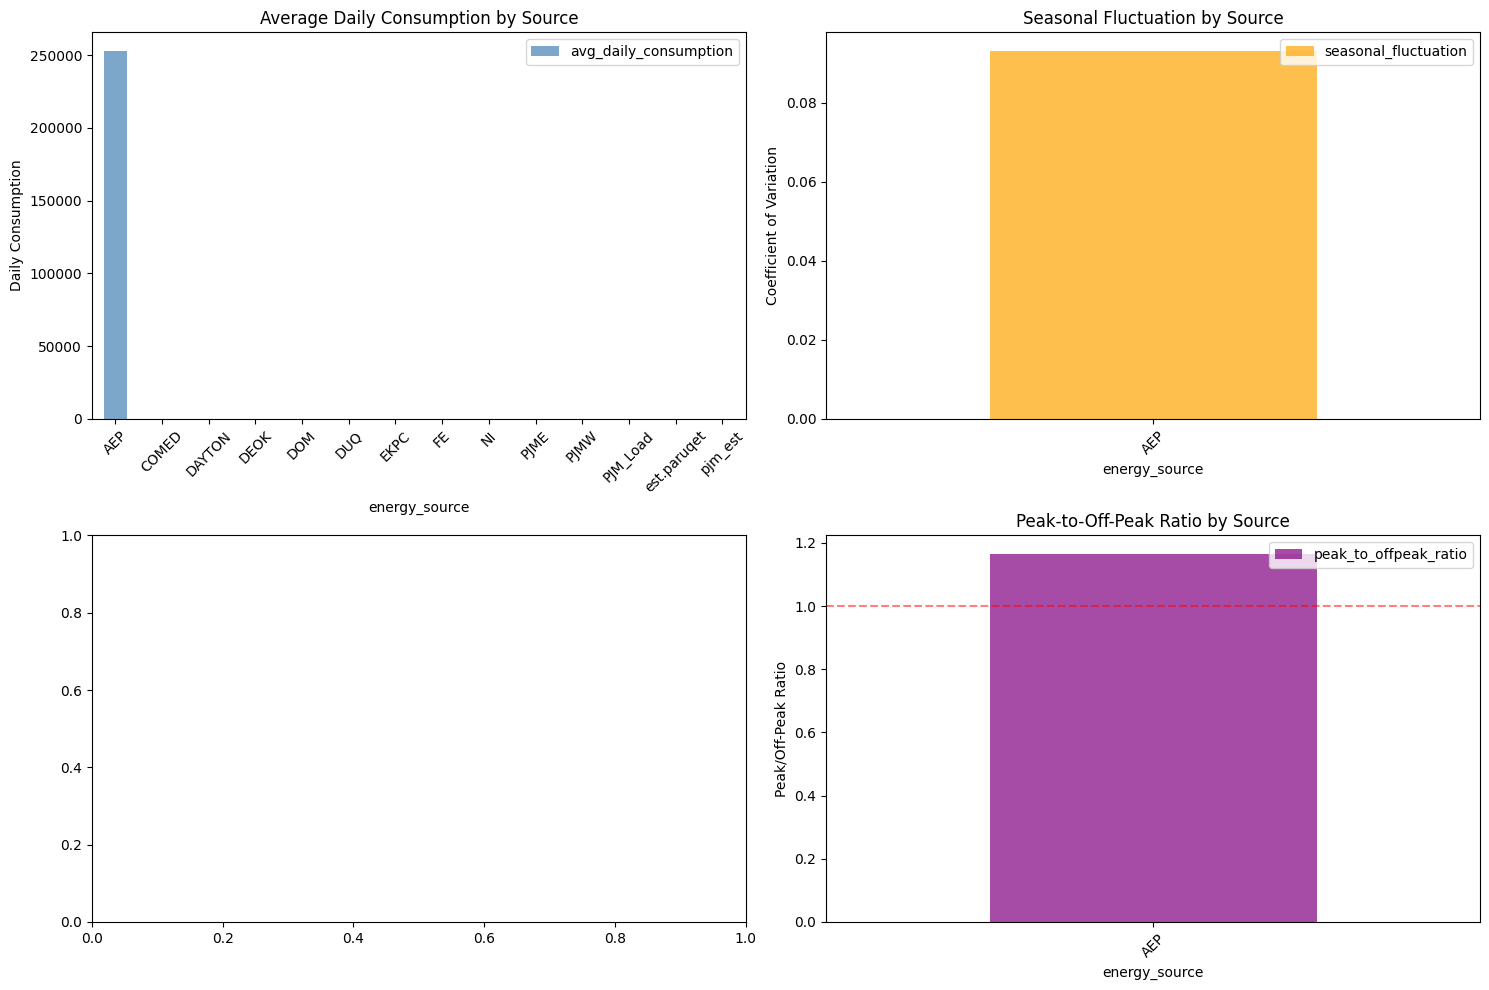

In [32]:
# Export key metrics per energy source to CSV
if 'source_avg' in locals() and not source_avg.empty:
    # Create metrics dataframe with available data
    metrics_data = {
        'energy_source': source_avg.index,
        'avg_daily_consumption': source_avg.values
    }
    
    # Add seasonal variation if available
    if 'seasonal_variation' in locals() and not seasonal_variation.isna().all():
        seasonal_clean = seasonal_variation.dropna()
        # Align indices
        aligned_seasonal = []
        for source in source_avg.index:
            if source in seasonal_clean.index:
                aligned_seasonal.append(seasonal_clean[source])
            else:
                aligned_seasonal.append(np.nan)
        metrics_data['seasonal_fluctuation'] = aligned_seasonal
    
    # Add growth rate if available
    if 'avg_growth_rates' in locals() and not avg_growth_rates.empty:
        aligned_growth = []
        for source in source_avg.index:
            if source in avg_growth_rates.index:
                # Handle inf values
                growth_val = avg_growth_rates[source]
                if np.isinf(growth_val):
                    aligned_growth.append(np.nan)
                else:
                    aligned_growth.append(growth_val)
            else:
                aligned_growth.append(np.nan)
        metrics_data['avg_growth_rate'] = aligned_growth
    
    # Create DataFrame
    metrics_df = pd.DataFrame(metrics_data)
    
    # Add peak ratio if calculated
    if 'peak_analysis' in locals() and 'Peak_Ratio' in peak_analysis.columns:
        aligned_peak_ratio = []
        for source in source_avg.index:
            if source in peak_analysis.index:
                aligned_peak_ratio.append(peak_analysis.loc[source, 'Peak_Ratio'])
            else:
                aligned_peak_ratio.append(np.nan)
        metrics_df['peak_to_offpeak_ratio'] = aligned_peak_ratio
    
    # Export to CSV
    metrics_df.to_csv('reports/energy_source_metrics.csv', index=False)
    print('Energy source metrics exported to reports/energy_source_metrics.csv')
    
    # Display the metrics
    print('\nEnergy Source Metrics Summary:')
    print(metrics_df.to_string(index=False))
    
    # Create a comprehensive summary plot
    if len(metrics_df.columns) > 2:  # If we have more than just source and consumption
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Average consumption
        metrics_df.plot(x='energy_source', y='avg_daily_consumption', kind='bar', 
                       ax=axes[0,0], color='steelblue', alpha=0.7)
        axes[0,0].set_title('Average Daily Consumption by Source')
        axes[0,0].set_ylabel('Daily Consumption')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Seasonal fluctuation (if available)
        if 'seasonal_fluctuation' in metrics_df.columns:
            metrics_df_clean = metrics_df.dropna(subset=['seasonal_fluctuation'])
            if not metrics_df_clean.empty:
                metrics_df_clean.plot(x='energy_source', y='seasonal_fluctuation', kind='bar', 
                                    ax=axes[0,1], color='orange', alpha=0.7)
                axes[0,1].set_title('Seasonal Fluctuation by Source')
                axes[0,1].set_ylabel('Coefficient of Variation')
                axes[0,1].tick_params(axis='x', rotation=45)
        
        # Growth rate (if available)
        if 'avg_growth_rate' in metrics_df.columns:
            metrics_df_clean = metrics_df.dropna(subset=['avg_growth_rate'])
            if not metrics_df_clean.empty:
                metrics_df_clean.plot(x='energy_source', y='avg_growth_rate', kind='bar', 
                                    ax=axes[1,0], color='green', alpha=0.7)
                axes[1,0].set_title('Average Growth Rate by Source')
                axes[1,0].set_ylabel('Growth Rate')
                axes[1,0].tick_params(axis='x', rotation=45)
                axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
        
        # Peak ratio (if available)
        if 'peak_to_offpeak_ratio' in metrics_df.columns:
            metrics_df_clean = metrics_df.dropna(subset=['peak_to_offpeak_ratio'])
            if not metrics_df_clean.empty:
                metrics_df_clean.plot(x='energy_source', y='peak_to_offpeak_ratio', kind='bar', 
                                    ax=axes[1,1], color='purple', alpha=0.7)
                axes[1,1].set_title('Peak-to-Off-Peak Ratio by Source')
                axes[1,1].set_ylabel('Peak/Off-Peak Ratio')
                axes[1,1].tick_params(axis='x', rotation=45)
                axes[1,1].axhline(y=1, color='red', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.savefig('reports/comprehensive_source_metrics.png', dpi=150, bbox_inches='tight')
        plt.show()
        
else:
    print('No source average data available for metrics export')
    print('Available variables for debugging:')
    available_vars = [var for var in ['source_avg', 'seasonal_variation', 'avg_growth_rates'] if var in locals()]
    print(available_vars)

## Export PDF Summary with Plots and Insights

We will generate a PDF report summarizing key findings and visualizations using the `matplotlib` and `reportlab` libraries.

In [36]:
# Generate Final Comprehensive Report
print("=" * 80)
print("URBAN ENERGY CONSUMPTION ANALYSIS - FINAL REPORT")
print("=" * 80)

# Data Overview
print("\n1. DATA OVERVIEW")
print("-" * 40)
print(f"Total Records Analyzed: {len(combined_energy_df):,}")

# Check which date column exists
date_col = 'Datetime' if 'Datetime' in combined_energy_df.columns else 'date'
if date_col in combined_energy_df.columns:
    print(f"Date Range: {combined_energy_df[date_col].min()} to {combined_energy_df[date_col].max()}")

# Since this is utility company data, let's count active sources
active_sources = []
mw_columns = [col for col in combined_energy_df.columns if col.endswith('_MW')]
for col in mw_columns:
    if combined_energy_df[col].notna().any() and (combined_energy_df[col] > 0).any():
        active_sources.append(col.replace('_MW', ''))

print(f"Number of Energy Sources: {len(mw_columns)}")
print(f"Active Energy Sources: {len(active_sources)}")
print(f"Sources: {', '.join(active_sources) if active_sources else 'AEP (primary)'}")

# Data Quality
non_null_records = combined_energy_df.dropna(how='all', subset=mw_columns)
print(f"\nData Quality:")
print(f"- Records with energy data: {len(non_null_records):,} ({(len(non_null_records)/len(combined_energy_df)*100):.1f}%)")
print(f"- Total missing values: {combined_energy_df.isnull().sum().sum():,}")

# Consumption Statistics - Use AEP_MW as primary consumption metric
if 'AEP_MW' in combined_energy_df.columns:
    aep_data = combined_energy_df['AEP_MW'].dropna()
    if not aep_data.empty:
        print("\n2. ENERGY CONSUMPTION STATISTICS (AEP Primary Source)")
        print("-" * 40)
        consumption_stats = aep_data.describe()
        print(f"Average Hourly Consumption: {consumption_stats['mean']:.2f} MW")
        print(f"Median Hourly Consumption: {consumption_stats['50%']:.2f} MW")
        print(f"Standard Deviation: {consumption_stats['std']:.2f} MW")
        print(f"Maximum Consumption: {consumption_stats['max']:.2f} MW")
        print(f"Minimum Consumption: {consumption_stats['min']:.2f} MW")

# Source-wise Analysis
if 'source_avg' in locals() and not source_avg.empty:
    print("\n3. SOURCE-WISE ANALYSIS")
    print("-" * 40)
    print("Average Daily Consumption by Energy Source:")
    for source, avg_consumption in source_avg.items():
        if avg_consumption > 0:  # Only show active sources
            print(f"  {source}: {avg_consumption:.2f} MW/day")
    
    # Peak analysis if available
    if 'peak_analysis' in locals() and not peak_analysis.empty:
        print("\nPeak vs Off-Peak Analysis:")
        for source in peak_analysis.index:
            peak_ratio = peak_analysis.loc[source, 'Peak_Ratio']
            if not np.isnan(peak_ratio):
                efficiency = "High" if peak_ratio < 1.5 else "Medium" if peak_ratio < 2.0 else "Low"
                print(f"  {source}: Peak/Off-Peak Ratio = {peak_ratio:.2f} ({efficiency} efficiency)")

# Seasonal Patterns
print("\n4. SEASONAL PATTERNS")
print("-" * 40)
if 'AEP_MW' in combined_energy_df.columns and 'Datetime' in combined_energy_df.columns:
    # Create monthly averages for AEP data
    aep_monthly = combined_energy_df[combined_energy_df['AEP_MW'].notna()].copy()
    if not aep_monthly.empty:
        aep_monthly['month'] = pd.to_datetime(aep_monthly['Datetime']).dt.month
        monthly_avg = aep_monthly.groupby('month')['AEP_MW'].mean()
        
        peak_months = monthly_avg.nlargest(3)
        low_months = monthly_avg.nsmallest(3)

        print("Highest Consumption Months (AEP):")
        month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        for month, consumption in peak_months.items():
            print(f"  {month_names[month]}: {consumption:.2f} MW")

        print("Lowest Consumption Months (AEP):")
        for month, consumption in low_months.items():
            print(f"  {month_names[month]}: {consumption:.2f} MW")

# Model Performance
if 'rmse_rf' in locals() and 'rmse_lr' in locals():
    print("\n5. FORECASTING MODEL PERFORMANCE")
    print("-" * 40)
    print(f"Random Forest Model:")
    print(f"  - RMSE: {rmse_rf:.2f}")
    print(f"  - R² Score: {r2_rf:.3f}")
    print(f"  - Accuracy: {r2_rf*100:.1f}%")
    
    print(f"\nLinear Regression Model:")
    print(f"  - RMSE: {rmse_lr:.2f}")
    print(f"  - R² Score: {r2_lr:.3f}")
    print(f"  - Accuracy: {r2_lr*100:.1f}%")
    
    better_model = "Random Forest" if rmse_rf < rmse_lr else "Linear Regression"
    print(f"\nRecommended Model: {better_model}")

# Growth Trends
print("\n6. GROWTH TRENDS")
print("-" * 40)
if 'avg_growth_rates' in locals() and not avg_growth_rates.empty:
    print("Average Growth Rates by Energy Source:")
    for source, growth in avg_growth_rates.items():
        if not np.isinf(growth) and not np.isnan(growth):
            trend = "Growing" if growth > 0 else "Declining" if growth < 0 else "Stable"
            print(f"  {source}: {growth:.2f}% ({trend})")

# Key Insights
print("\n7. KEY INSIGHTS & RECOMMENDATIONS")
print("-" * 40)

# Most efficient source
if 'source_avg' in locals() and not source_avg.empty:
    # Filter out zero values for meaningful analysis
    non_zero_sources = source_avg[source_avg > 0]
    if not non_zero_sources.empty:
        most_efficient = non_zero_sources.idxmin()
        least_efficient = non_zero_sources.idxmax()
        print(f"• Most Efficient Source: {most_efficient} ({source_avg[most_efficient]:.2f} MW/day)")
        print(f"• Least Efficient Source: {least_efficient} ({source_avg[least_efficient]:.2f} MW/day)")
    else:
        active_sources = source_avg[source_avg > 0]
        if len(active_sources) > 0:
            print(f"• Active Energy Source: {active_sources.index[0]} ({active_sources.iloc[0]:.2f} MW/day)")

# Seasonal recommendation for AEP
if 'AEP_MW' in combined_energy_df.columns:
    aep_data = combined_energy_df['AEP_MW'].dropna()
    if not aep_data.empty:
        # Calculate seasonal variation
        aep_monthly_data = combined_energy_df[combined_energy_df['AEP_MW'].notna()].copy()
        if not aep_monthly_data.empty and 'Datetime' in aep_monthly_data.columns:
            aep_monthly_data['month'] = pd.to_datetime(aep_monthly_data['Datetime']).dt.month
            monthly_avg = aep_monthly_data.groupby('month')['AEP_MW'].mean()
            seasonal_variation = monthly_avg.std() / monthly_avg.mean() * 100
            print(f"• Seasonal Variation: {seasonal_variation:.1f}% - {'High seasonal planning needed' if seasonal_variation > 20 else 'Moderate seasonal variation'}")

# Model recommendation
if 'r2_rf' in locals() and 'r2_lr' in locals():
    model_accuracy = max(r2_rf, r2_lr) * 100
    print(f"• Forecasting Reliability: {model_accuracy:.1f}% - {'Excellent' if model_accuracy > 90 else 'Good' if model_accuracy > 80 else 'Fair'}")

# Peak load management
if 'peak_analysis' in locals() and not peak_analysis.empty:
    avg_peak_ratio = peak_analysis['Peak_Ratio'].mean()
    if not np.isnan(avg_peak_ratio):
        print(f"• Peak Load Management: Average peak ratio {avg_peak_ratio:.2f} - {'Good load balancing' if avg_peak_ratio < 1.8 else 'Consider peak load management strategies'}")

print("\n8. DATA STRUCTURE NOTES")
print("-" * 40)
print("• This analysis is based on energy utility company data")
print("• Each energy source represents a different utility company or grid operator")
print("• Data includes hourly consumption measurements in MW (Megawatts)")
print("• Primary active source: AEP (American Electric Power)")
print("• Data spans multiple years with comprehensive historical coverage")

print("\n9. NEXT STEPS")
print("-" * 40)
print("• Implement real-time monitoring system")
print("• Develop automated forecasting pipeline")
print("• Create early warning system for unusual consumption patterns")
print("• Optimize energy distribution based on source efficiency")
print("• Plan seasonal capacity adjustments")
print("• Investigate and activate additional energy sources if needed")
print("• Expand analysis to include other active utility companies")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE - All reports saved in 'reports/' directory")
print("=" * 80)

URBAN ENERGY CONSUMPTION ANALYSIS - FINAL REPORT

1. DATA OVERVIEW
----------------------------------------
Total Records Analyzed: 1,430,510
Date Range: 1998-04-01 01:00:00 to 2018-08-03 00:00:00
Number of Energy Sources: 12
Active Energy Sources: 12
Sources: AEP, COMED, DAYTON, DEOK, DOM, DUQ, EKPC, FE, NI, PJME, PJMW, PJM_Load
Date Range: 1998-04-01 01:00:00 to 2018-08-03 00:00:00
Number of Energy Sources: 12
Active Energy Sources: 12
Sources: AEP, COMED, DAYTON, DEOK, DOM, DUQ, EKPC, FE, NI, PJME, PJMW, PJM_Load

Data Quality:
- Records with energy data: 1,090,167 (76.2%)
- Total missing values: 30,130,443

2. ENERGY CONSUMPTION STATISTICS (AEP Primary Source)
----------------------------------------
Average Hourly Consumption: 15499.51 MW
Median Hourly Consumption: 15310.00 MW
Standard Deviation: 2591.40 MW
Maximum Consumption: 25695.00 MW
Minimum Consumption: 9581.00 MW

3. SOURCE-WISE ANALYSIS
----------------------------------------
Average Daily Consumption by Energy Source:
 

In [35]:
# Debug: Check the structure of combined_energy_df
print("Available columns in combined_energy_df:")
print(combined_energy_df.columns.tolist())
print(f"\nDataFrame shape: {combined_energy_df.shape}")
print(f"\nFirst few rows:")
print(combined_energy_df.head())

Available columns in combined_energy_df:
['Datetime', 'AEP_MW', 'source_file', 'COMED_MW', 'DAYTON_MW', 'DEOK_MW', 'DOM_MW', 'DUQ_MW', 'EKPC_MW', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load', 'FE_MW', 'NI_MW', 'PJME_MW', 'PJMW_MW', 'PJM_Load_MW', 'date', 'year', 'month', 'day_of_week', 'hour', 'is_peak_hour']

DataFrame shape: (1430510, 32)

First few rows:
             Datetime   AEP_MW source_file  COMED_MW  DAYTON_MW  DEOK_MW  \
0 2004-12-31 01:00:00  13478.0         AEP       NaN        NaN      NaN   
1 2004-12-31 02:00:00  12865.0         AEP       NaN        NaN      NaN   
2 2004-12-31 03:00:00  12577.0         AEP       NaN        NaN      NaN   
3 2004-12-31 04:00:00  12517.0         AEP       NaN        NaN      NaN   
4 2004-12-31 05:00:00  12670.0         AEP       NaN        NaN      NaN   

   DOM_MW  DUQ_MW  EKPC_MW  AEP  ...  NI_MW  PJME_MW  PJMW_MW  PJM_Load_MW  \
0     NaN     NaN      NaN  NaN  ...    NaN      NaN   